In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/heart (2).csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset["target"].describe()


,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
dataset["target"].unique()


array([1, 0])

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


target
1    165
0    138
Name: count, dtype: int64


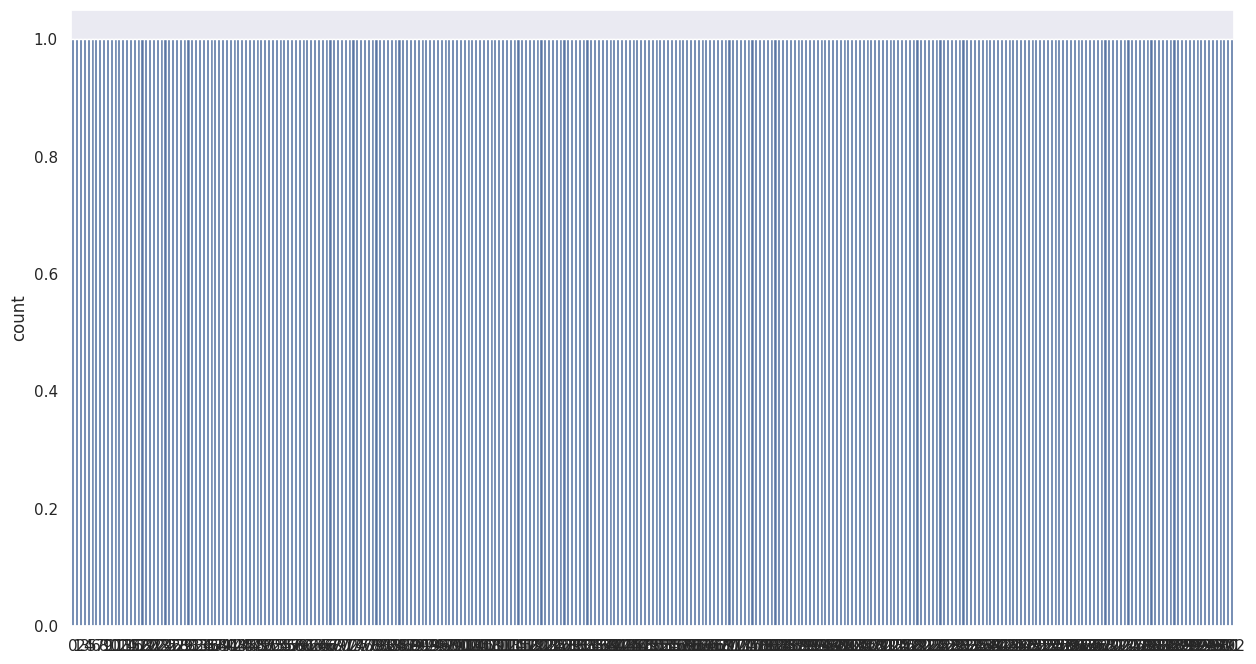

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)
#plt.bar(target_temp,y)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [ ]:
dataset["sex"].unique()

array([1, 0])

<BarContainer object of 303 artists>

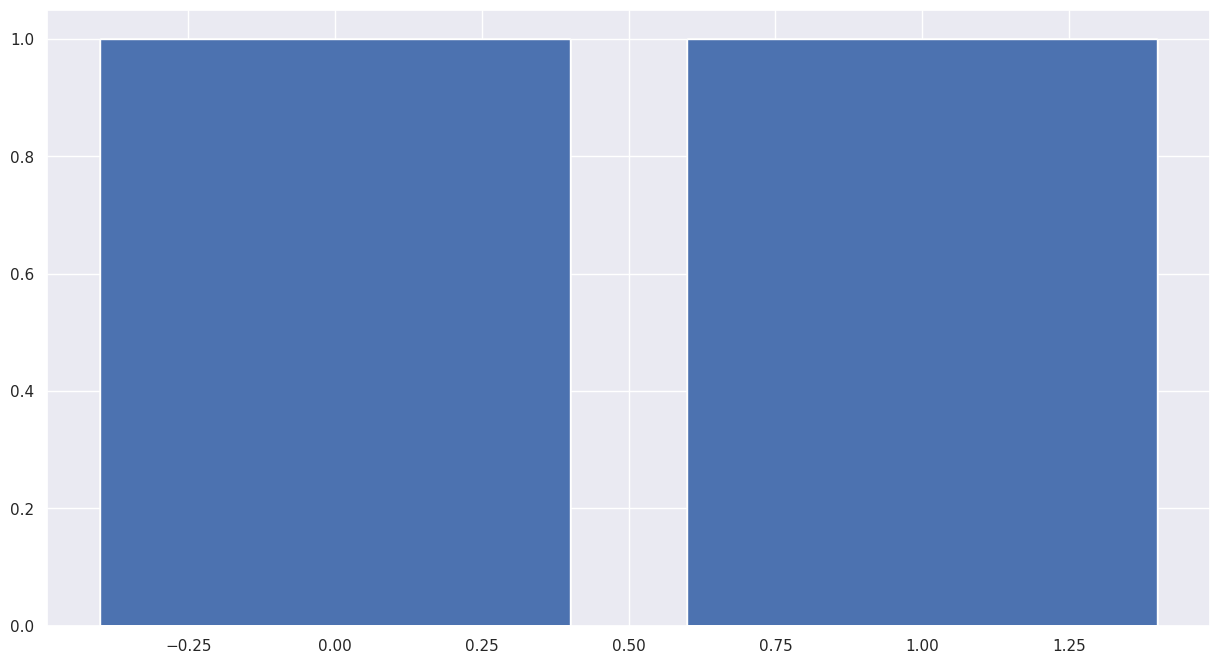

In [ ]:
#sns.barplot(dataset["sex"])
plt.bar(dataset["sex"],y)

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: ylabel='target'>

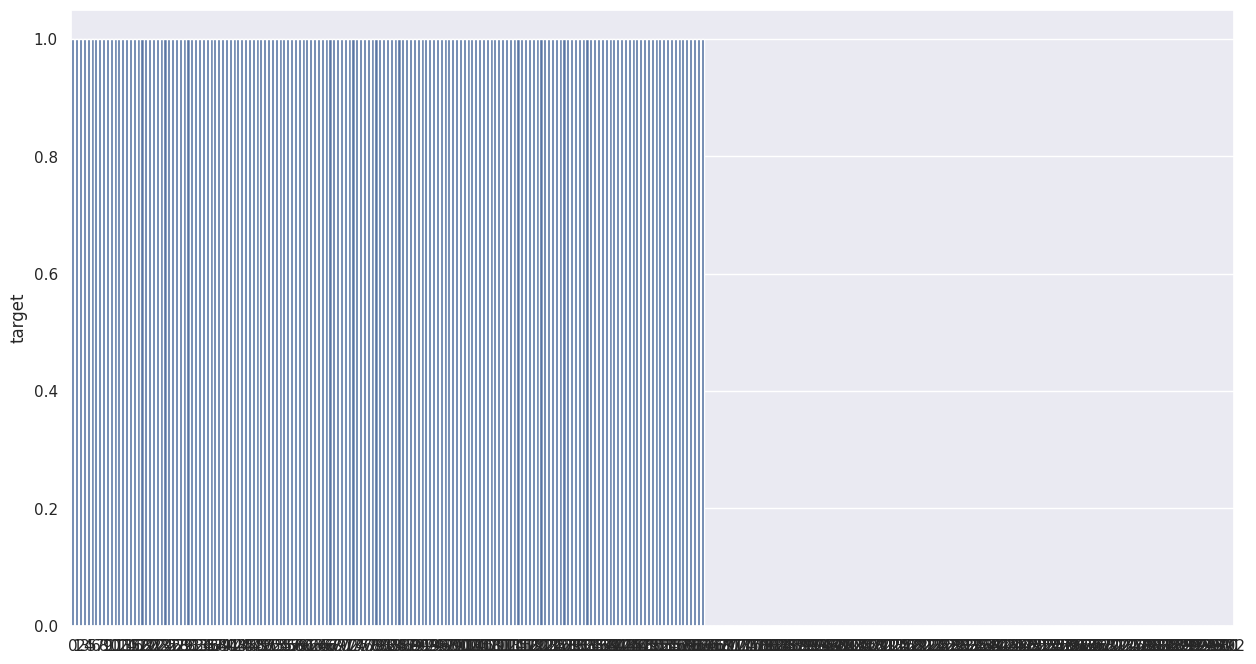

In [ ]:
sns.barplot(y)

In [ ]:
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dataset["fbs"].unique()

array([1, 0])

In [ ]:
dataset["fbs"].unique()

array([1, 0])

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: ylabel='restecg'>

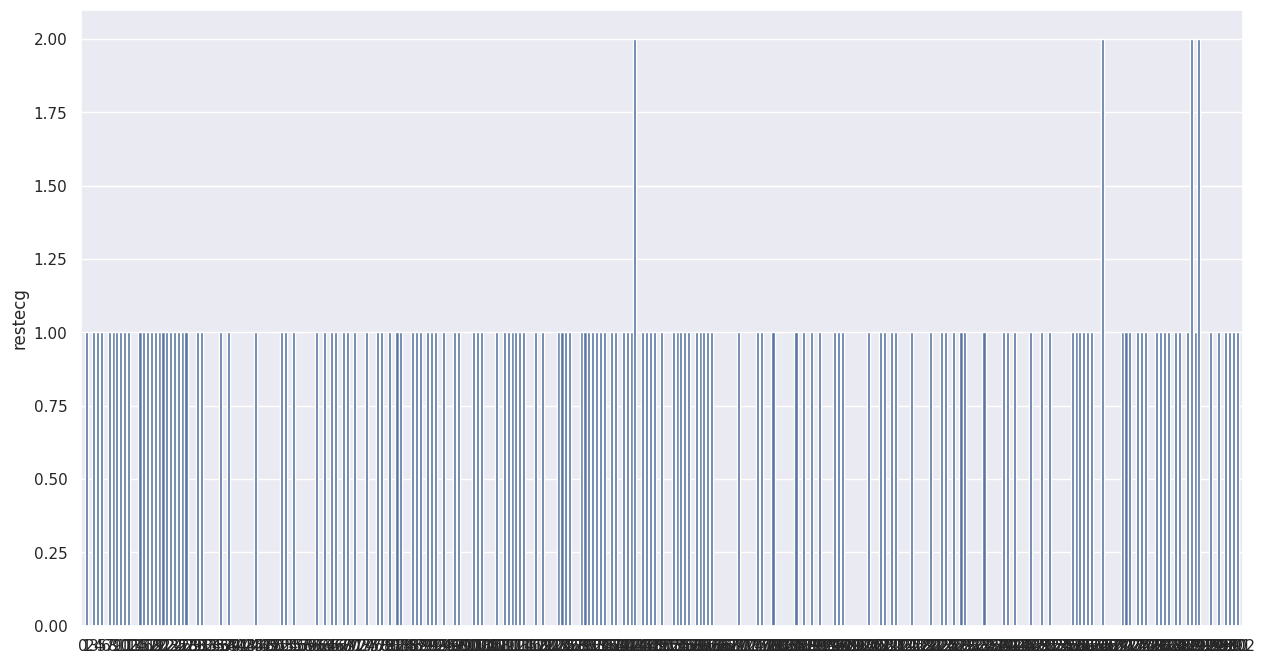

In [ ]:
sns.barplot(dataset["restecg"])

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: ylabel='exang'>

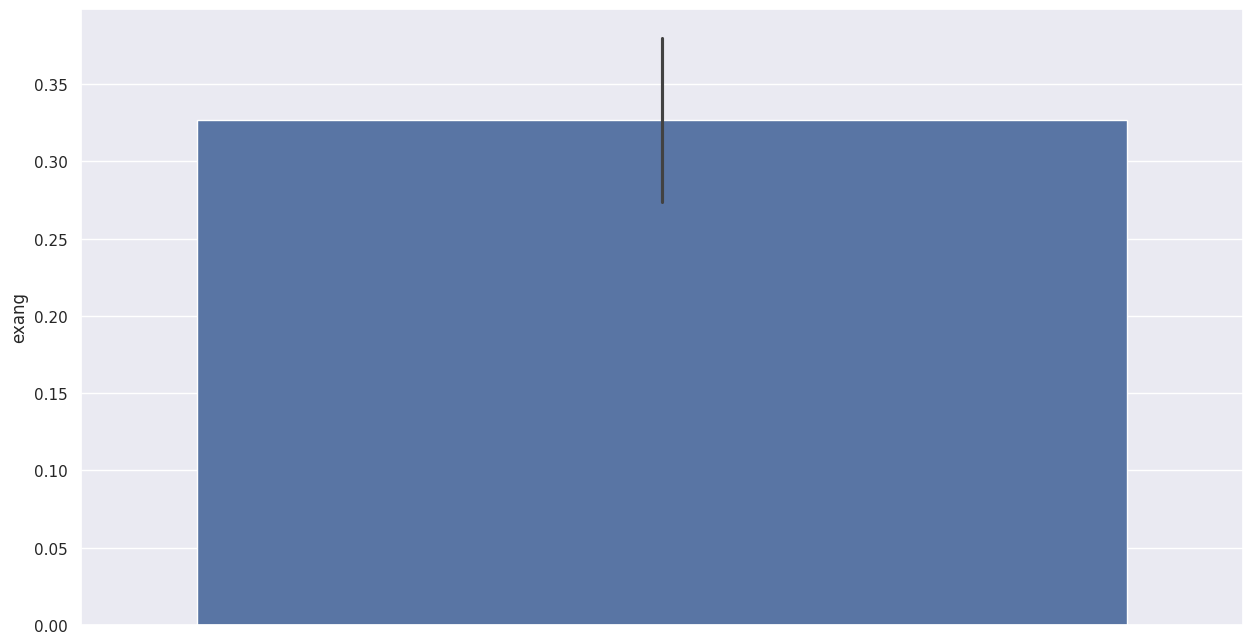

In [ ]:
sns.barplot(y=dataset["exang"])

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: ylabel='slope'>

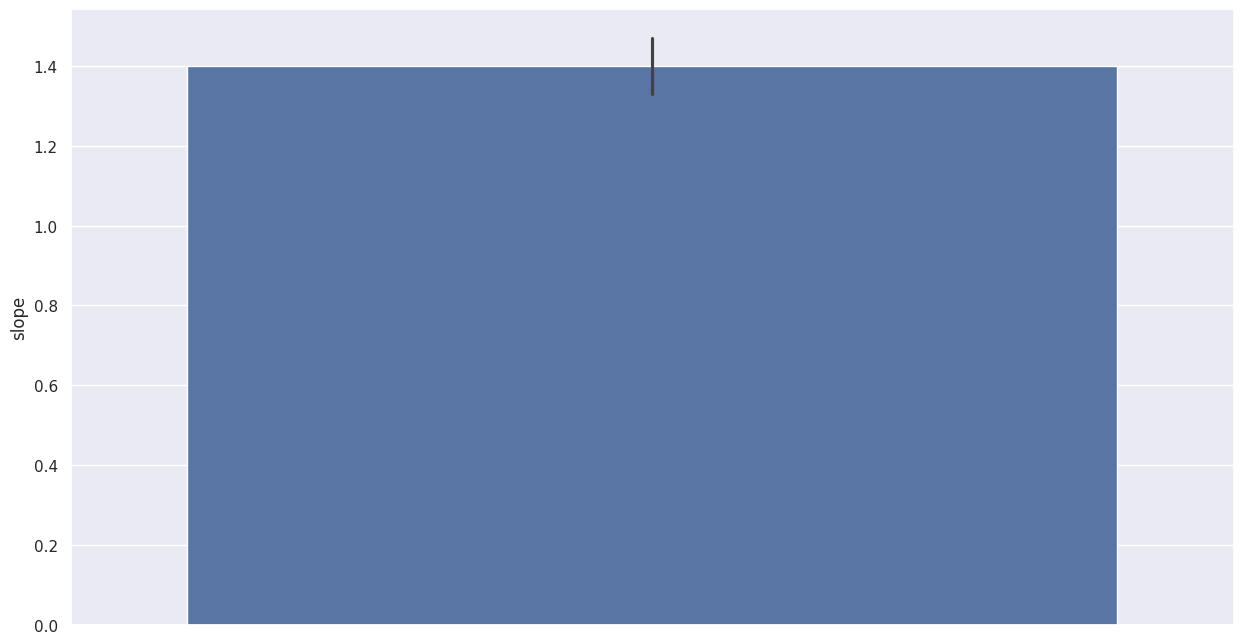

In [ ]:
sns.barplot(y=dataset["slope"])

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

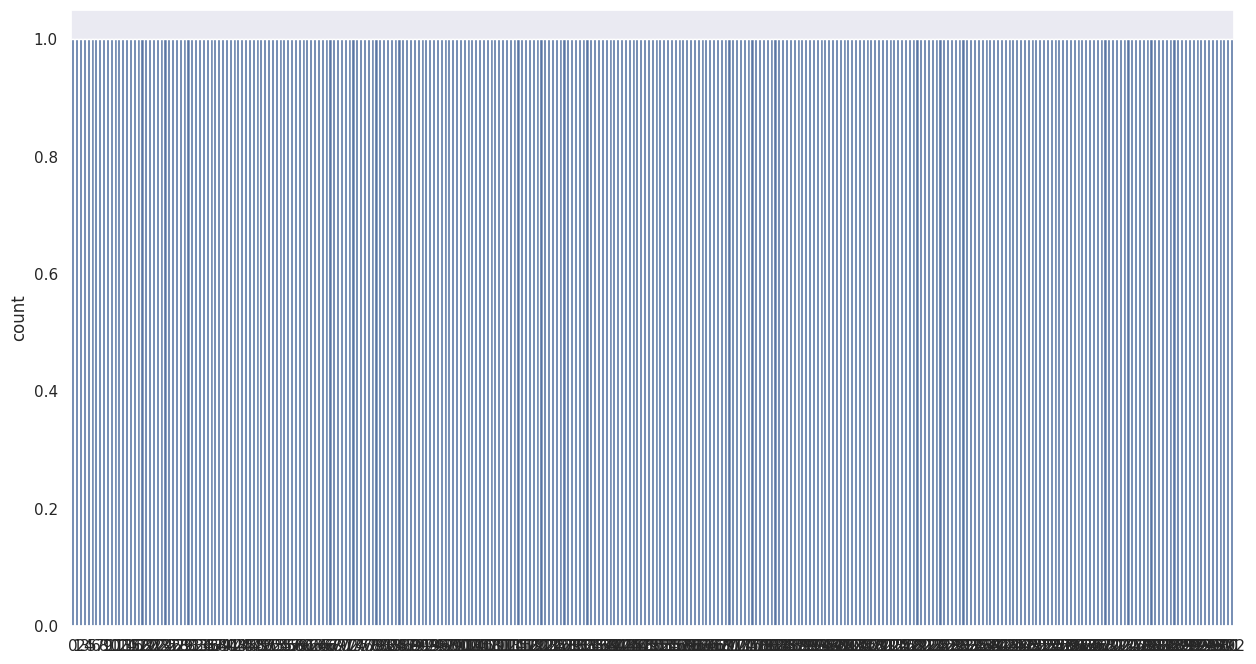

In [ ]:
sns.countplot(dataset["ca"])

<Axes: ylabel='ca'>

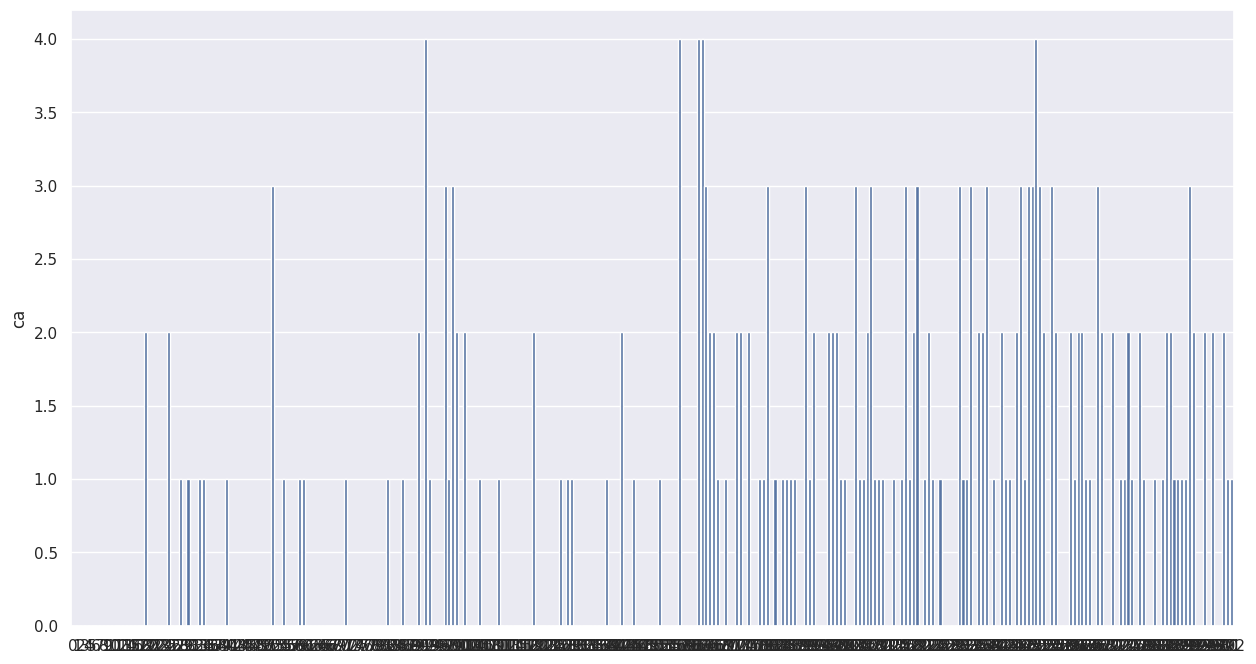

In [ ]:
sns.barplot(dataset["ca"])

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: ylabel='thal'>

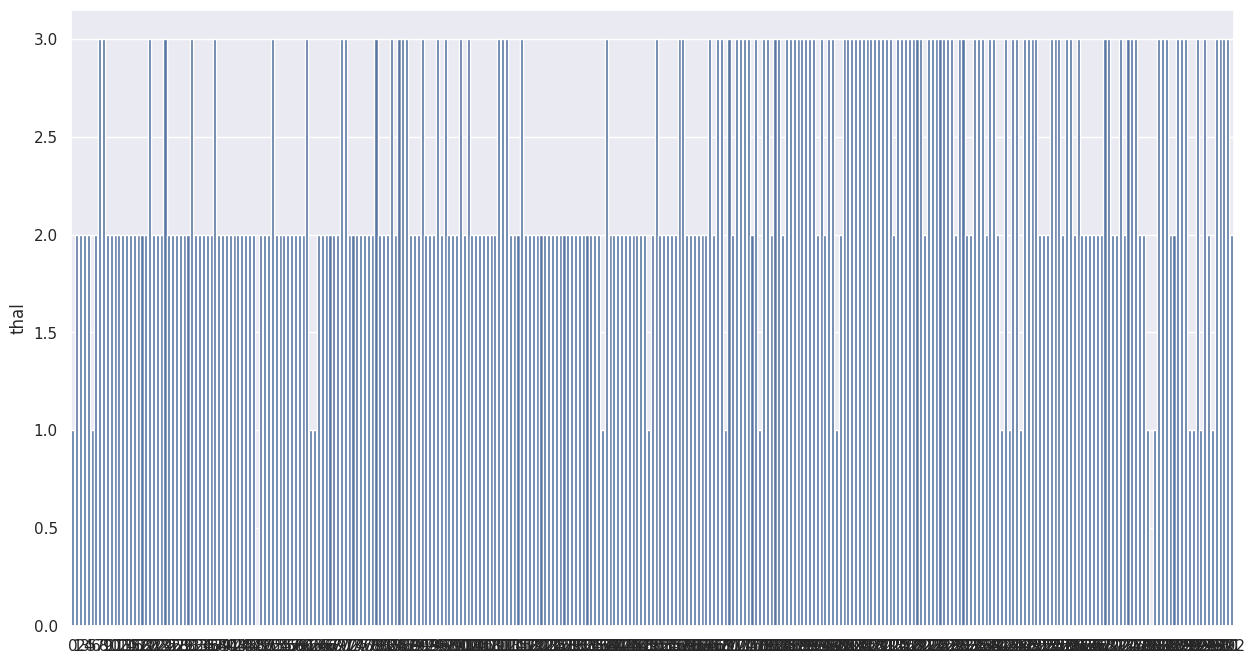

In [ ]:
sns.barplot(dataset["thal"])

<Axes: xlabel='thal', ylabel='Density'>

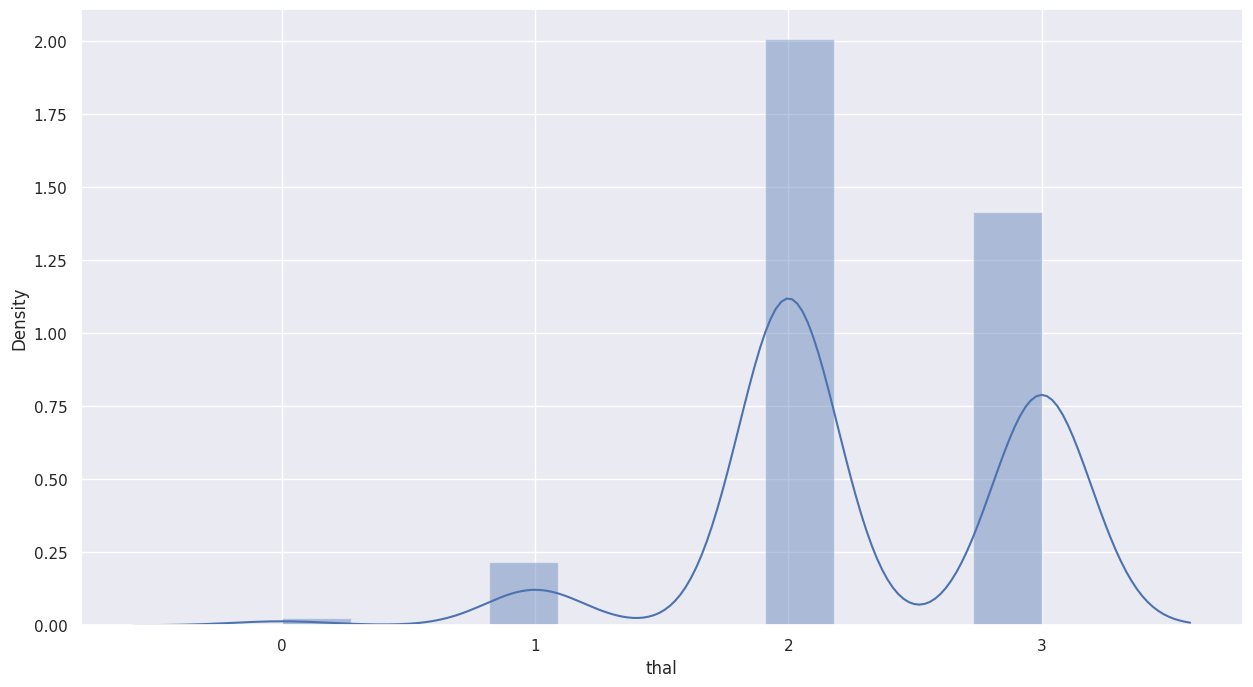

In [ ]:
sns.distplot(dataset["thal"])

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape
Y_test.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

(61,)
The accuracy score achieved using Decision Tree is: 81.97 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4618 - loss: 89.3318
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4985 - loss: 72.0214 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4834 - loss: 64.5618 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4368 - loss: 59.3434 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4953 - loss: 42.7919
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4780 - loss: 34.4178 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4593 - loss: 26.1157 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4505 - loss: 16.7048 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4693 - loss: 6.3777 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5686 - loss: 2.0971 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6012 - loss: 2.9479 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.627

Using TensorFlow backend.

In [ ]:
Y_pred_nn = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 80.33 %


VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):

    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 80.33 %


<BarContainer object of 8 artists>

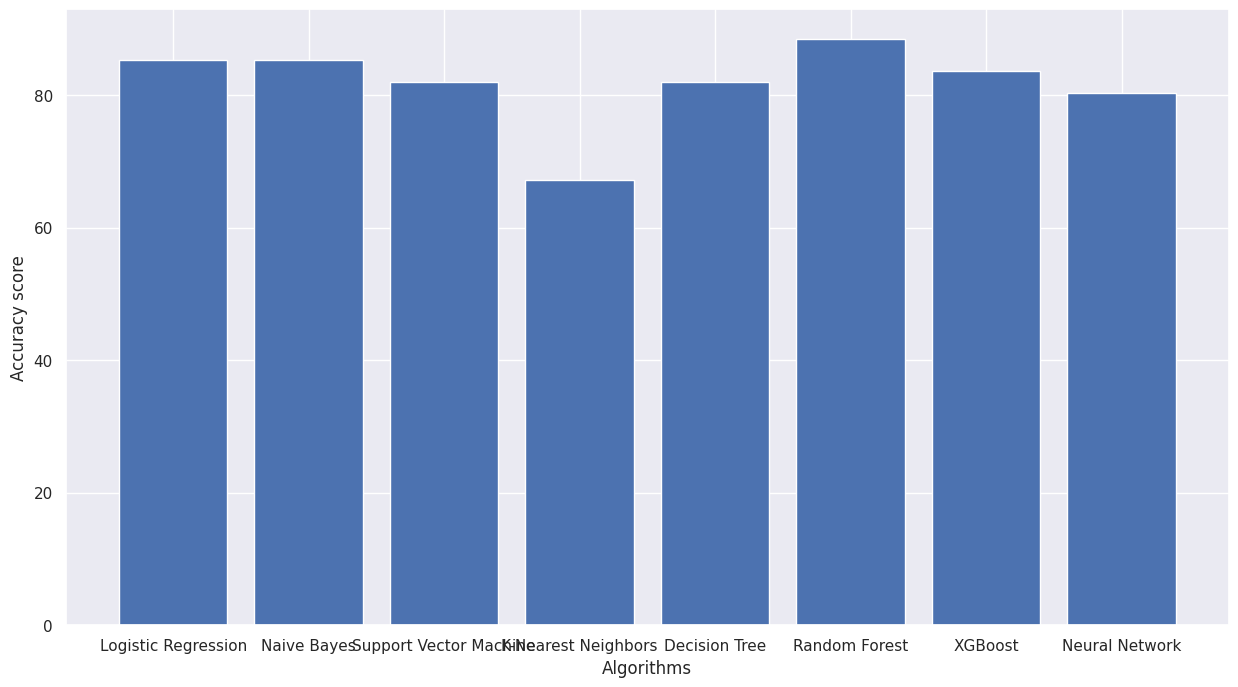

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

#sns.barplot(algorithms,scores)
plt.bar(algorithms,scores)


In [ ]:
# For Logistic Regression:
cm_lr = confusion_matrix(Y_test, Y_pred_lr)

# For Naive Bayes:
cm_nb = confusion_matrix(Y_test, Y_pred_nb)

# For SVM:
cm_svm = confusion_matrix(Y_test, Y_pred_svm)

# ... (Similarly for other models)

Confusion Matrix for Logistic Regression:
[[22  5]
 [ 4 30]]


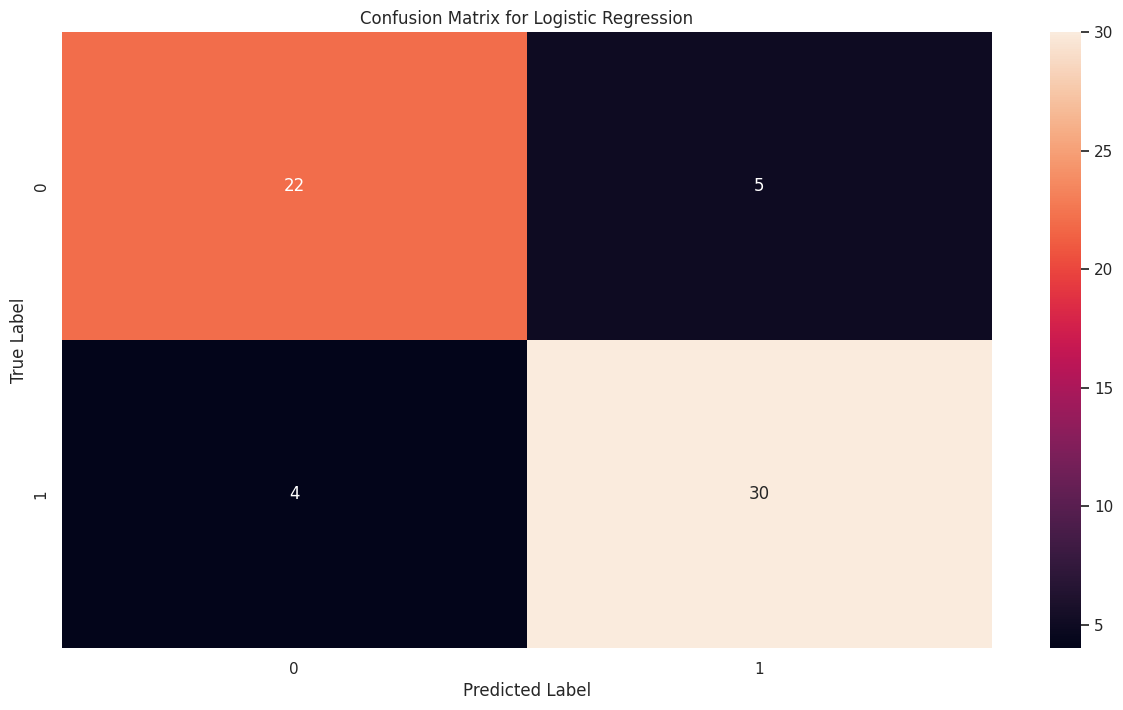

In [ ]:
# Using print():
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Using seaborn for a heatmap visualization:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_lr, annot=True, fmt="d")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ... (Similarly for other models)

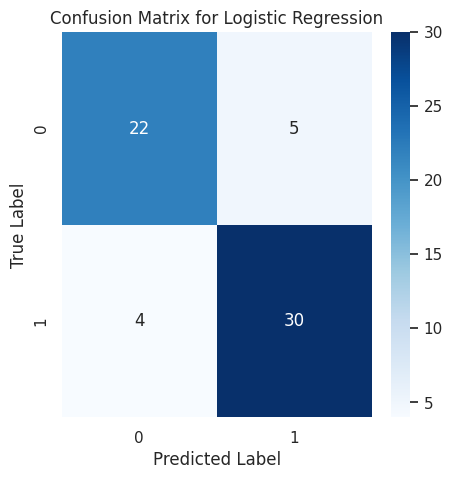

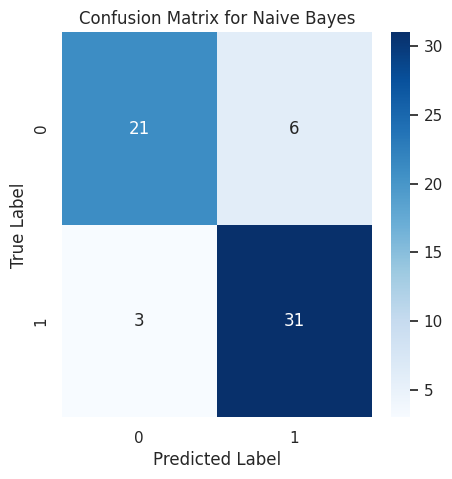

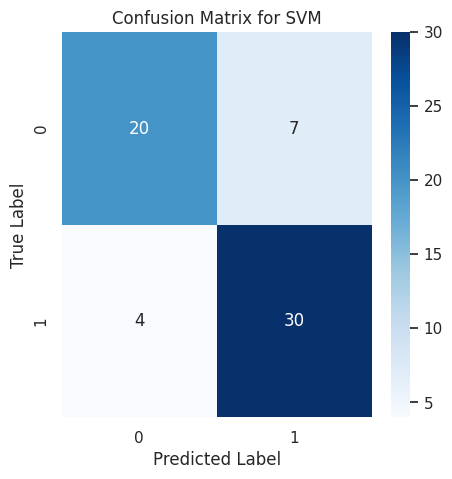

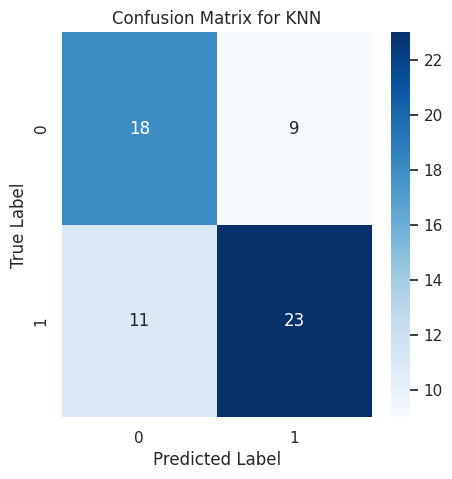

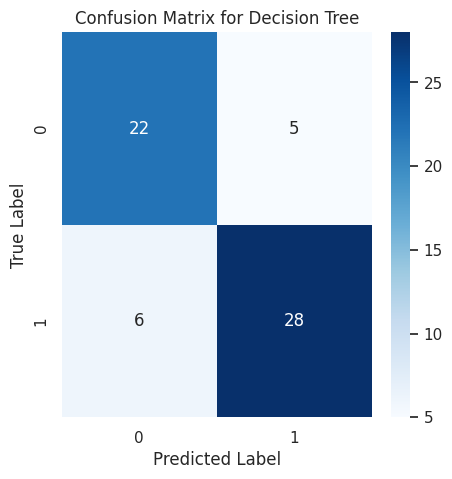

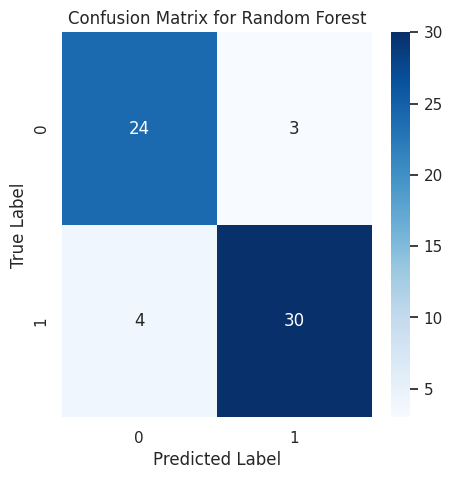

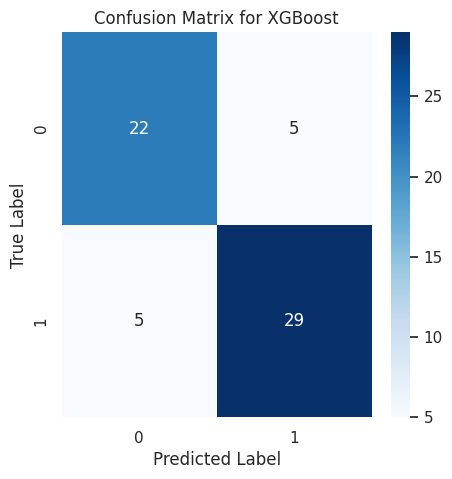

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using your models:

# Logistic Regression
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Naive Bayes
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Support Vector Machine
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# K-Nearest Neighbors
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# XGBoost
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



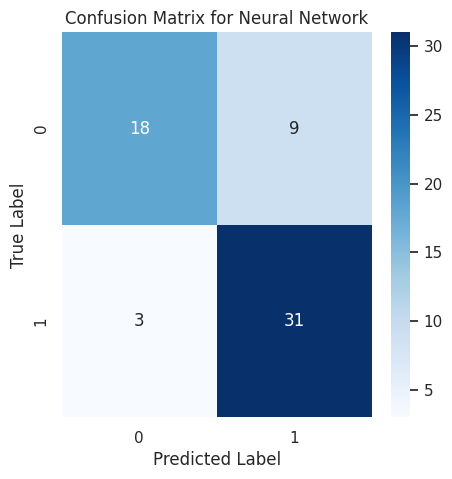

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using your Neural Network model:

cm_nn = confusion_matrix(Y_test, Y_pred_nn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_lr from your Logistic Regression model

precision = precision_score(Y_test, Y_pred_lr)
recall = recall_score(Y_test, Y_pred_lr)
f1 = f1_score(Y_test, Y_pred_lr)

print("Metrics for Logistic Regression:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Logistic Regression:
  Precision: 0.8571
  Recall: 0.8824
  F1 Score: 0.8696


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_rf from your Random Forest model

precision = precision_score(Y_test, Y_pred_rf)
recall = recall_score(Y_test, Y_pred_rf)
f1 = f1_score(Y_test, Y_pred_rf)

print("Metrics for Random Forest:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Random Forest:
  Precision: 0.9091
  Recall: 0.8824
  F1 Score: 0.8955


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_xgb from your XGBoost model

precision = precision_score(Y_test, Y_pred_xgb)
recall = recall_score(Y_test, Y_pred_xgb)
f1 = f1_score(Y_test, Y_pred_xgb)

print("Metrics for XGBoost:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for XGBoost:
  Precision: 0.8529
  Recall: 0.8529
  F1 Score: 0.8529


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_nb from your Naive Bayes model

precision = precision_score(Y_test, Y_pred_nb)
recall = recall_score(Y_test, Y_pred_nb)
f1 = f1_score(Y_test, Y_pred_nb)

print("Metrics for Naive Bayes:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Naive Bayes:
  Precision: 0.8378
  Recall: 0.9118
  F1 Score: 0.8732


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_svm from your SVM model

precision = precision_score(Y_test, Y_pred_svm)
recall = recall_score(Y_test, Y_pred_svm)
f1 = f1_score(Y_test, Y_pred_svm)

print("Metrics for Support Vector Machine:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Support Vector Machine:
  Precision: 0.8108
  Recall: 0.8824
  F1 Score: 0.8451


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_dt from your Decision Tree model

precision = precision_score(Y_test, Y_pred_dt)
recall = recall_score(Y_test, Y_pred_dt)
f1 = f1_score(Y_test, Y_pred_dt)

print("Metrics for Decision Tree:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Decision Tree:
  Precision: 0.8485
  Recall: 0.8235
  F1 Score: 0.8358


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_nn from your Neural Network model

precision = precision_score(Y_test, Y_pred_nn)
recall = recall_score(Y_test, Y_pred_nn)
f1 = f1_score(Y_test, Y_pred_nn)

print("Metrics for Neural Network:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Neural Network:
  Precision: 0.7750
  Recall: 0.9118
  F1 Score: 0.8378


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_knn from your KNN model

precision = precision_score(Y_test, Y_pred_knn)
recall = recall_score(Y_test, Y_pred_knn)
f1 = f1_score(Y_test, Y_pred_knn)

print("Metrics for K-Nearest Neighbors:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for K-Nearest Neighbors:
  Precision: 0.7188
  Recall: 0.6765
  F1 Score: 0.6970


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/heart (2).csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset["target"].describe()


,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
dataset["target"].unique()


array([1, 0])

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


target
1    165
0    138
Name: count, dtype: int64


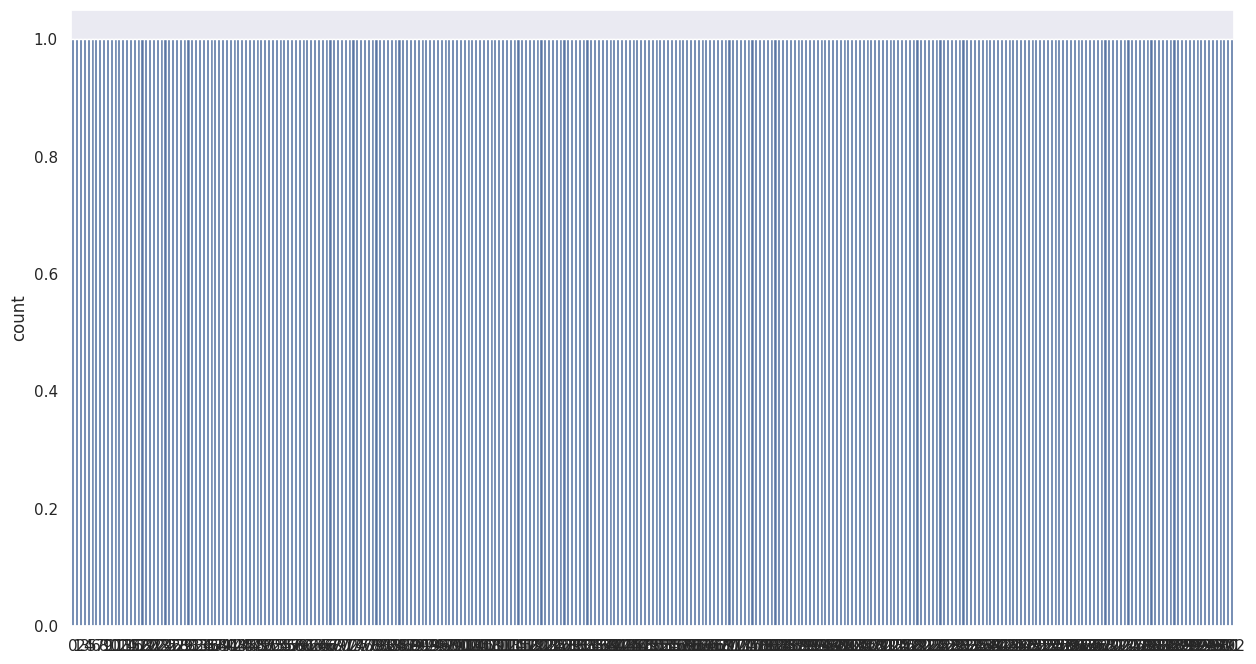

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)
#plt.bar(target_temp,y)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [ ]:
dataset["sex"].unique()

array([1, 0])

<BarContainer object of 303 artists>

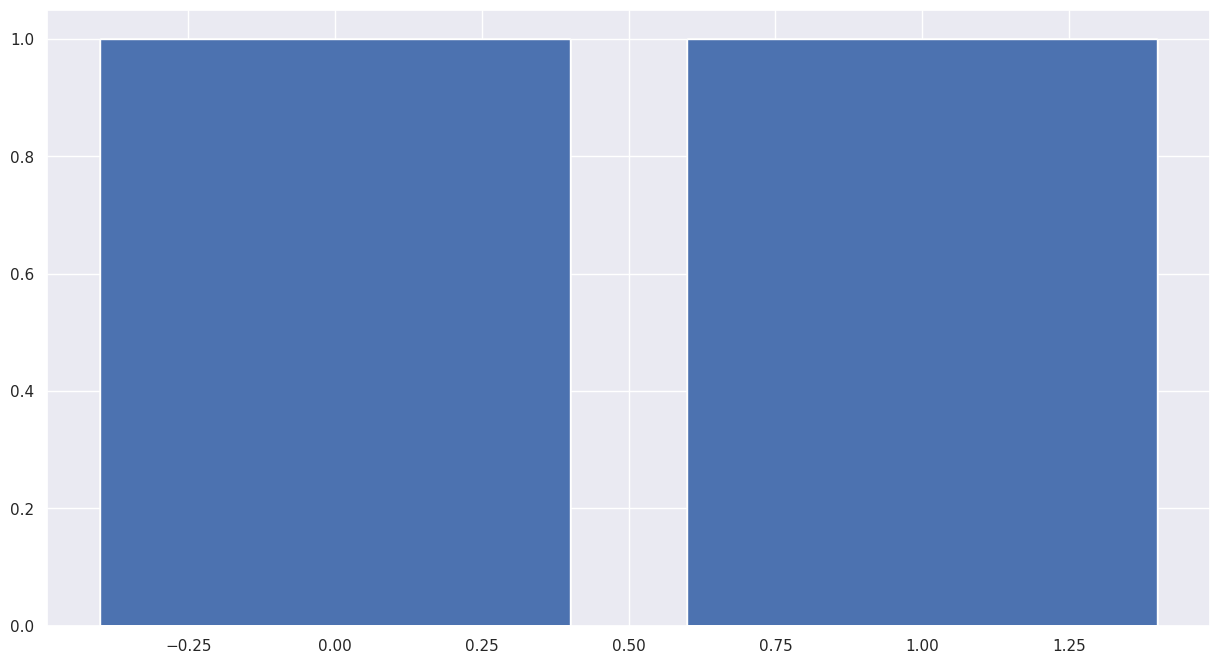

In [ ]:
#sns.barplot(dataset["sex"])
plt.bar(dataset["sex"],y)

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: ylabel='target'>

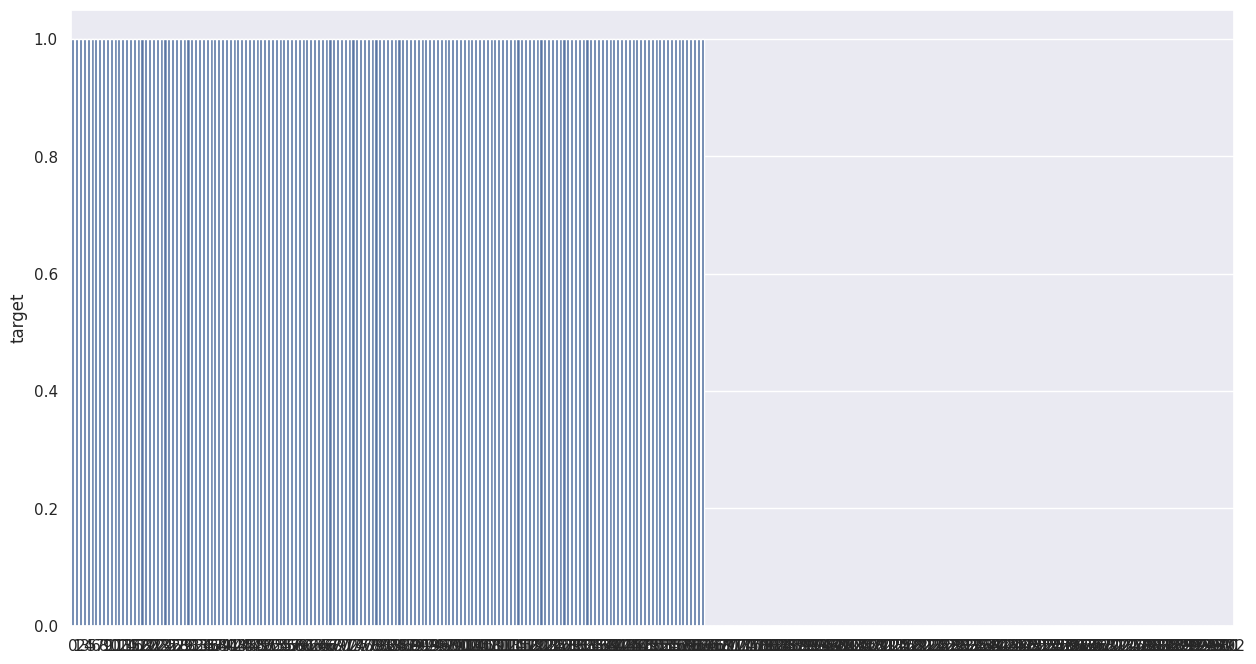

In [ ]:
sns.barplot(y)

In [ ]:
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dataset["fbs"].unique()

array([1, 0])

In [ ]:
dataset["fbs"].unique()

array([1, 0])

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: ylabel='restecg'>

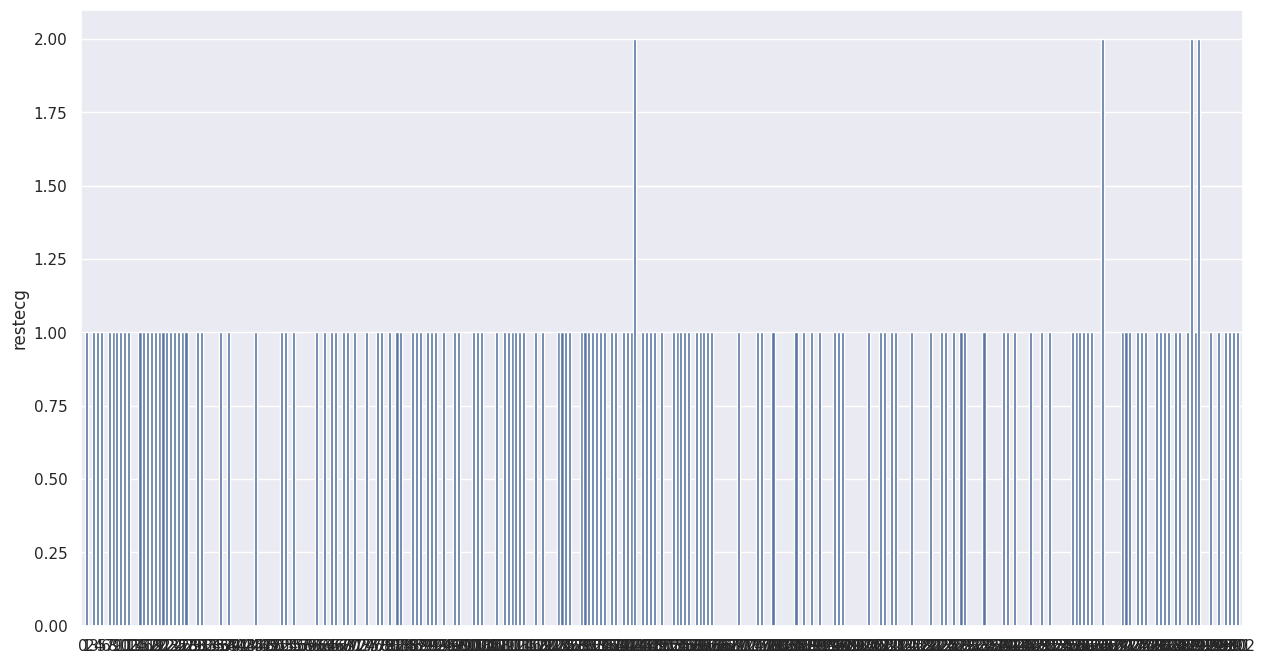

In [ ]:
sns.barplot(dataset["restecg"])

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: ylabel='exang'>

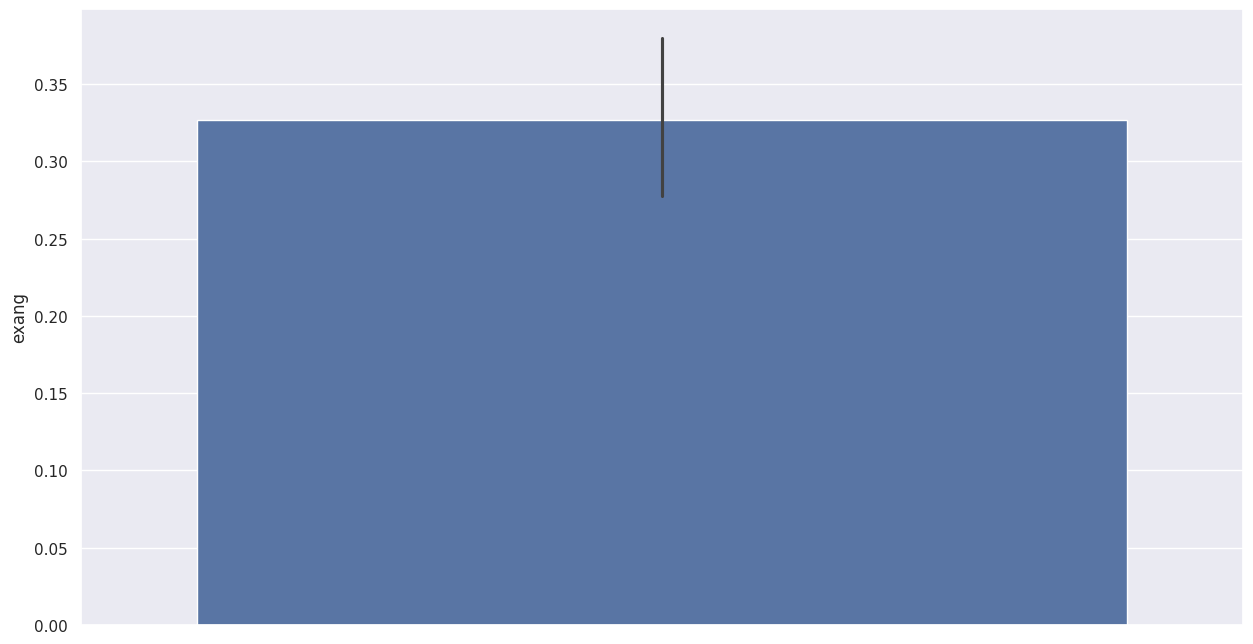

In [ ]:
sns.barplot(y=dataset["exang"])

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: ylabel='slope'>

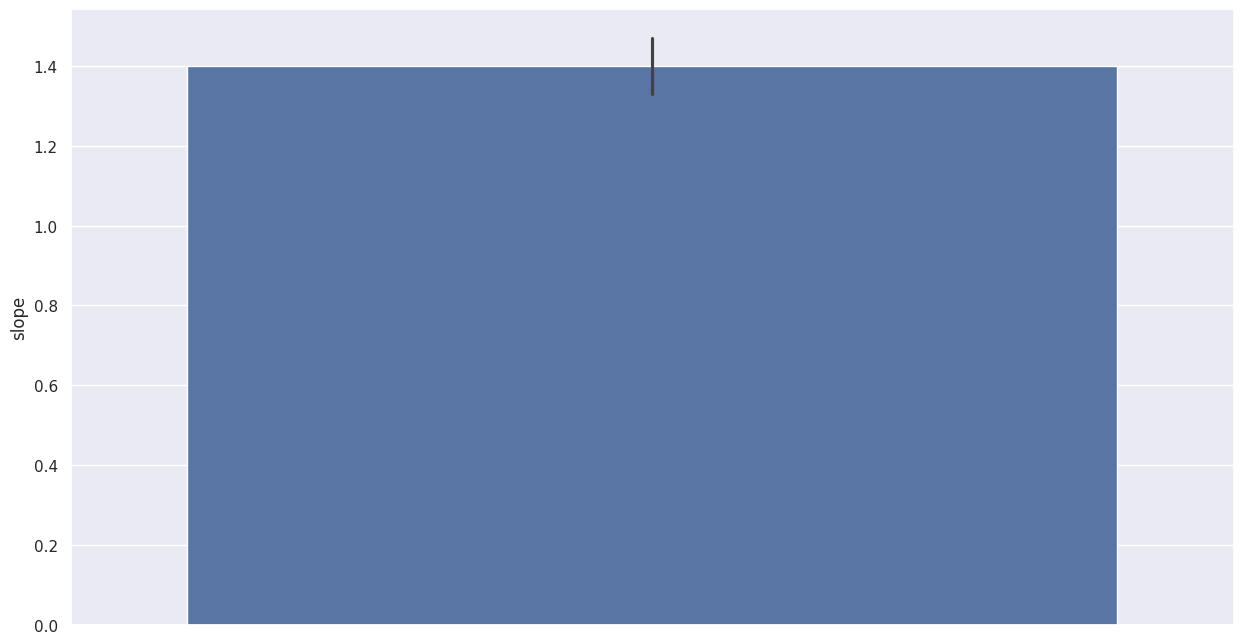

In [ ]:
sns.barplot(y=dataset["slope"])

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

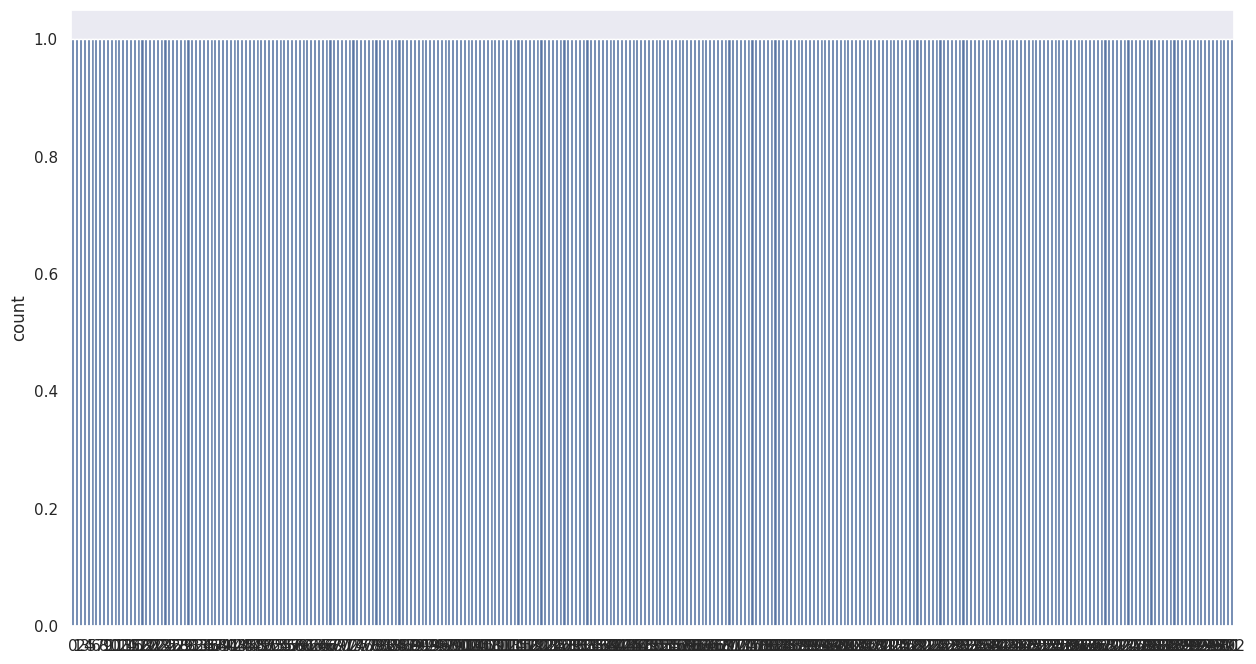

In [ ]:
sns.countplot(dataset["ca"])

<Axes: ylabel='ca'>

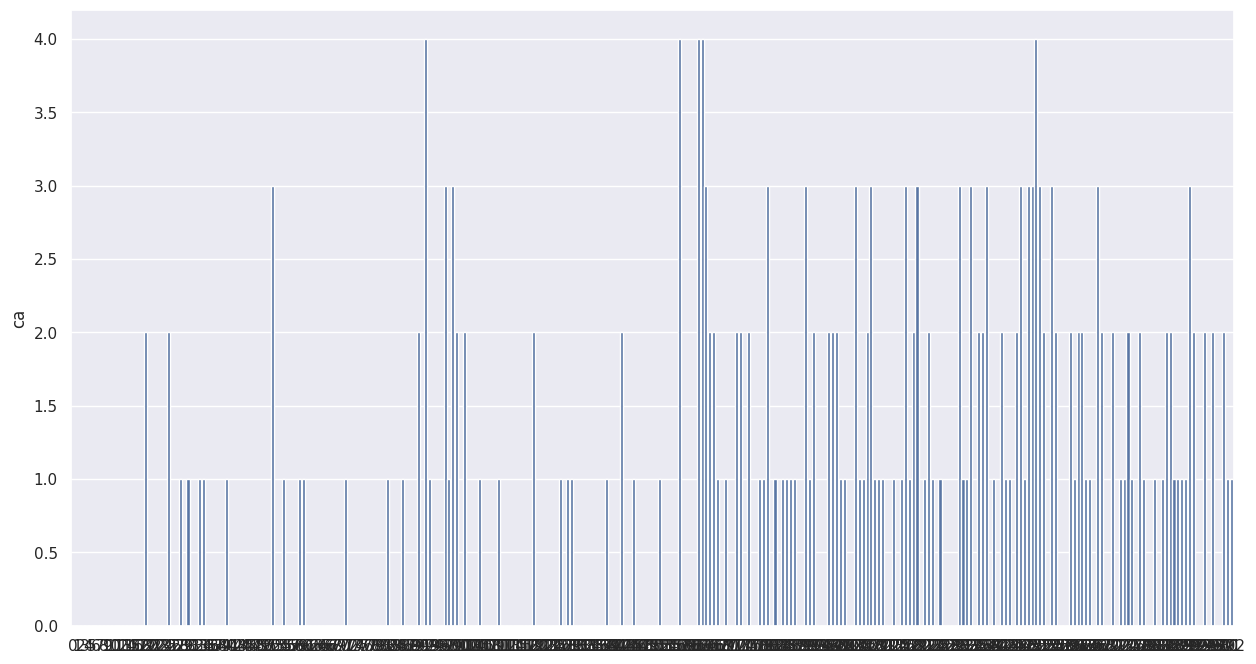

In [ ]:
sns.barplot(dataset["ca"])

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: ylabel='thal'>

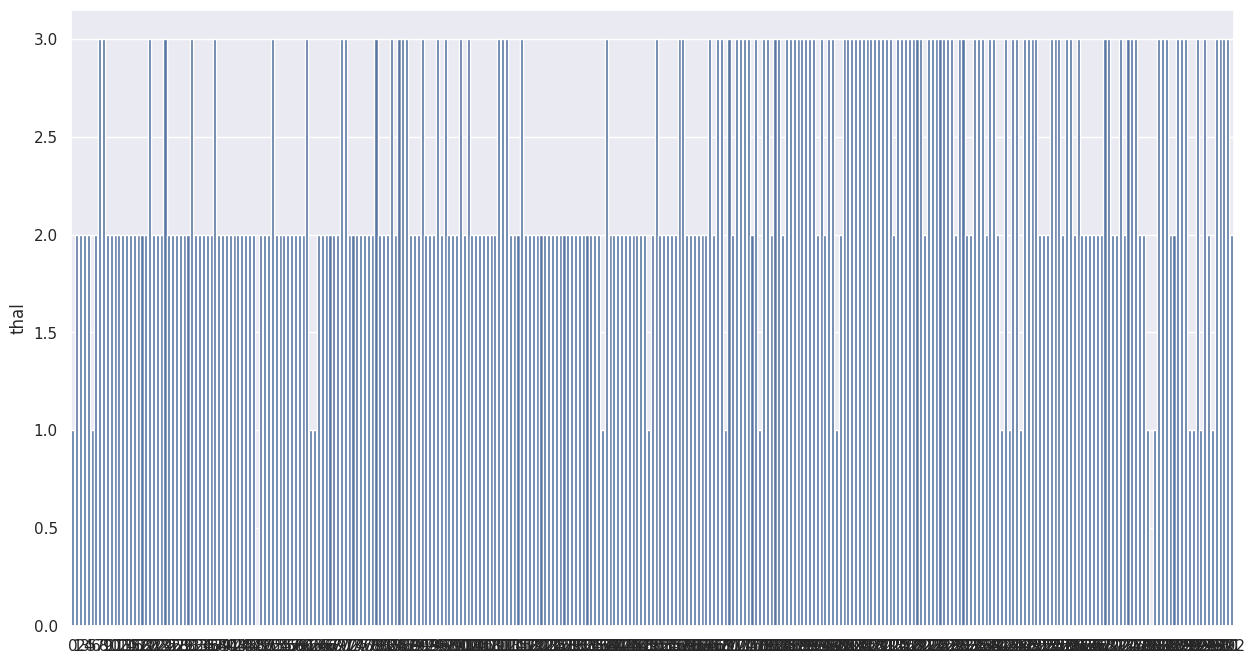

In [ ]:
sns.barplot(dataset["thal"])

<Axes: xlabel='thal', ylabel='Density'>

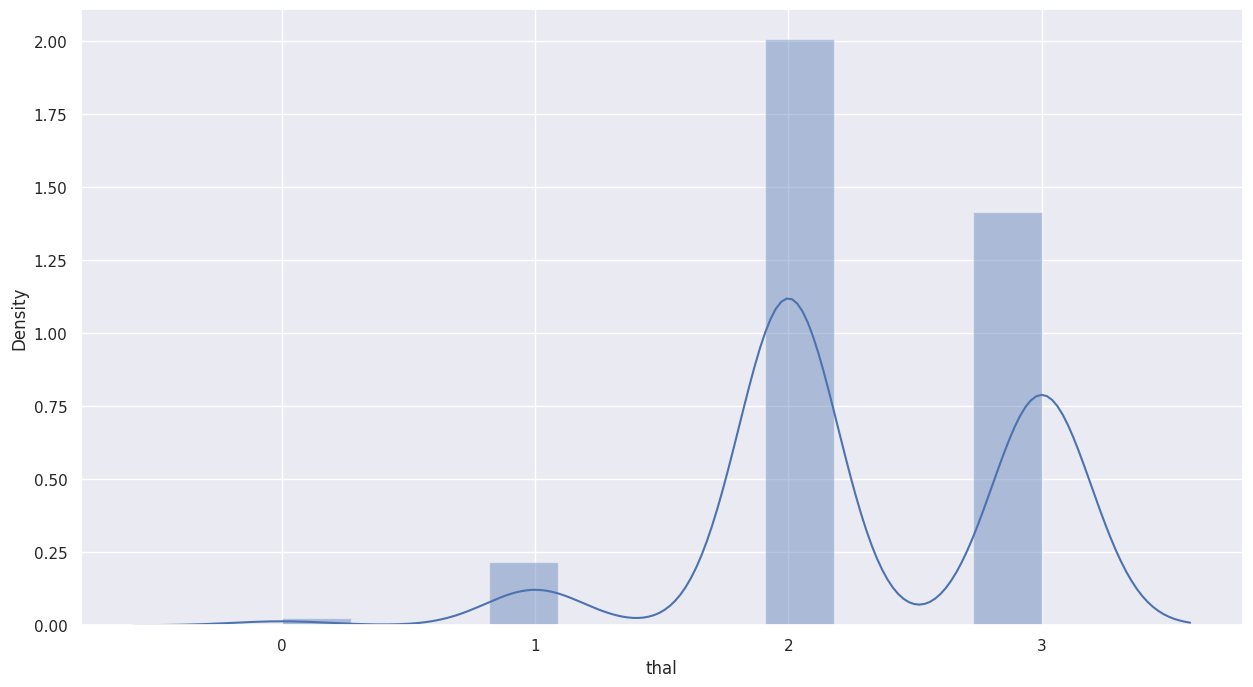

In [ ]:
sns.distplot(dataset["thal"])

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape
Y_test.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

(61,)
The accuracy score achieved using Decision Tree is: 81.97 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5222 - loss: 88.6858
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5639 - loss: 76.7724 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5003 - loss: 81.7190  
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5470 - loss: 70.1481 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5340 - loss: 68.7551  
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5668 - loss: 60.1604  
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5438 - loss: 57.5363 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5247 - loss: 54.3125 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5054 - loss: 50.5041 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5483 - loss: 40.2752 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5072 - loss: 38.2301 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

Using TensorFlow backend.

In [ ]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 80.33 %


VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):

    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 80.33 %


<BarContainer object of 8 artists>

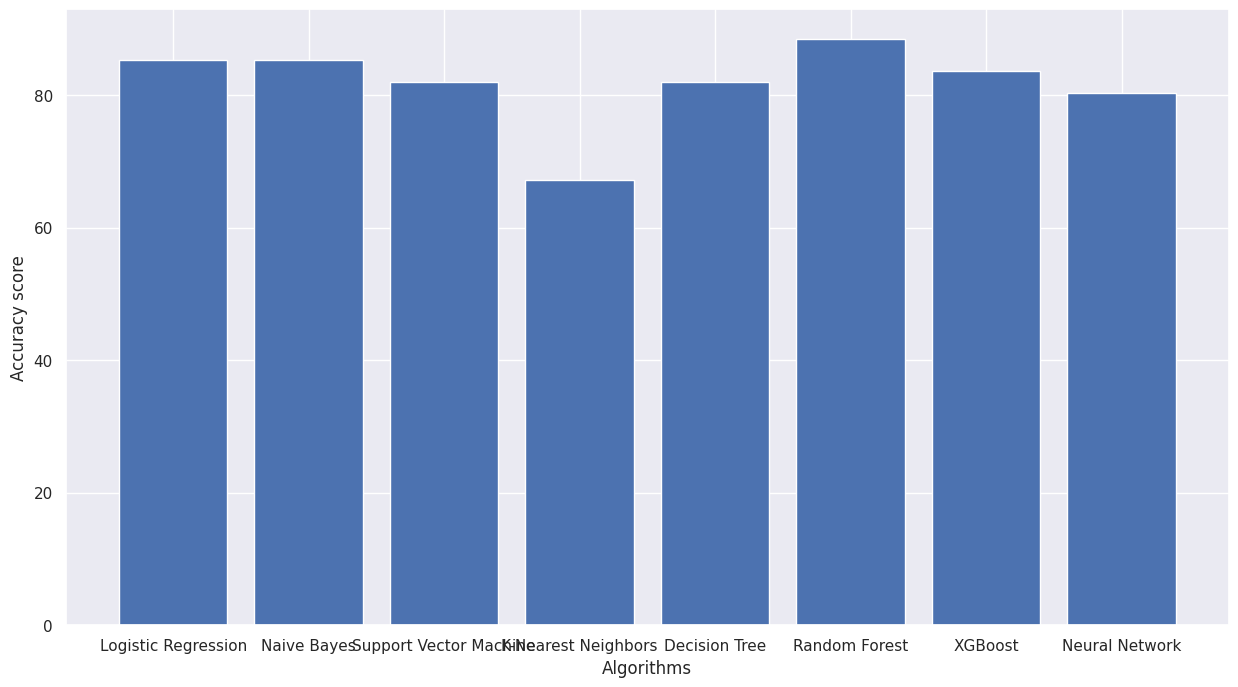

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

#sns.barplot(algorithms,scores)
plt.bar(algorithms,scores)


In [ ]:
# For Logistic Regression:
cm_lr = confusion_matrix(Y_test, Y_pred_lr)

# For Naive Bayes:
cm_nb = confusion_matrix(Y_test, Y_pred_nb)

# For SVM:
cm_svm = confusion_matrix(Y_test, Y_pred_svm)

# ... (Similarly for other models)

Confusion Matrix for Logistic Regression:
[[22  5]
 [ 4 30]]


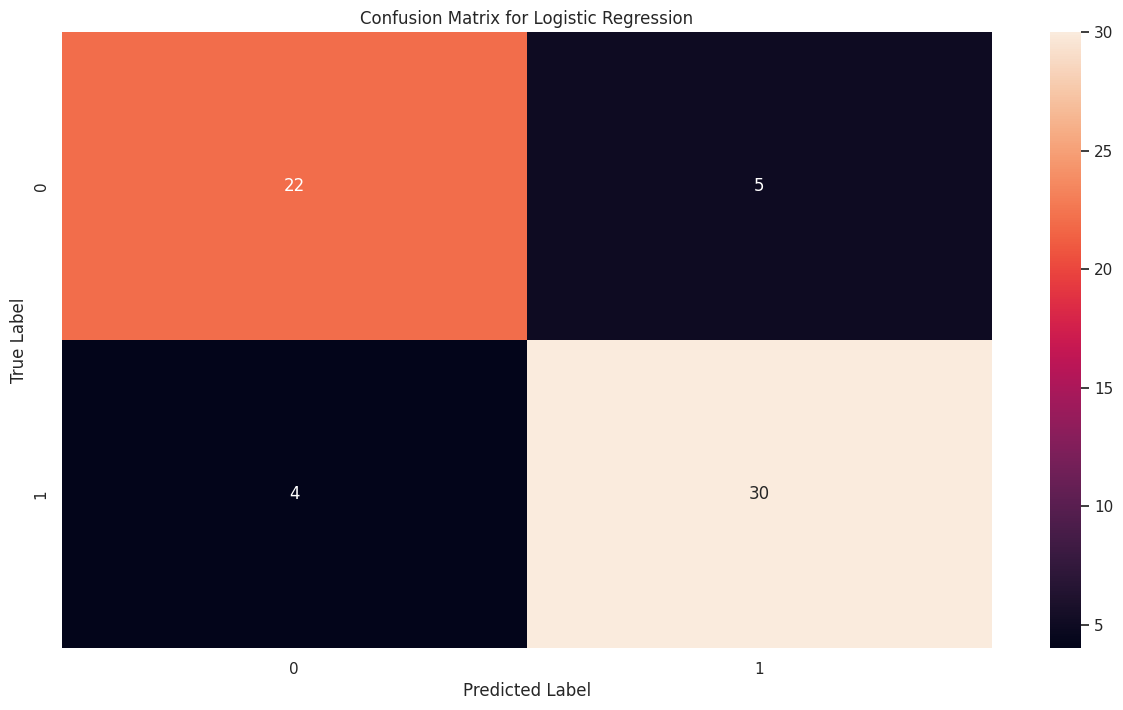

In [ ]:
# Using print():
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Using seaborn for a heatmap visualization:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_lr, annot=True, fmt="d")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ... (Similarly for other models)

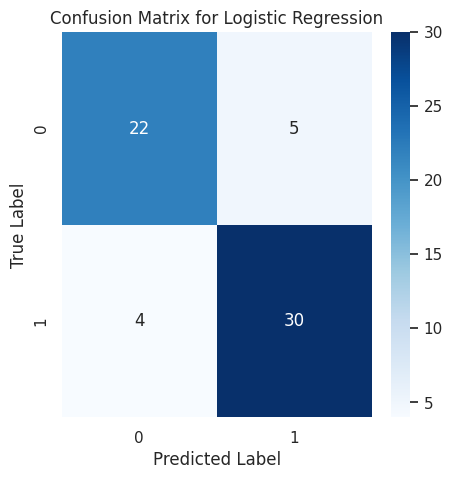

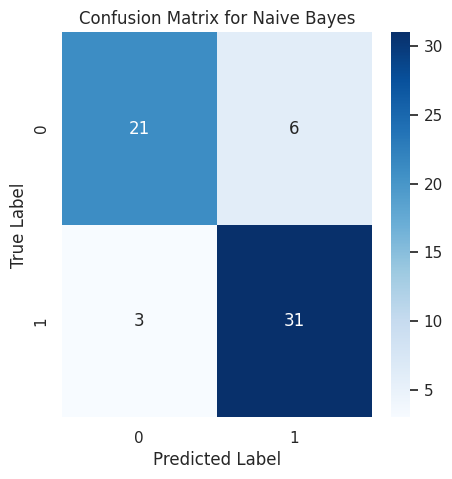

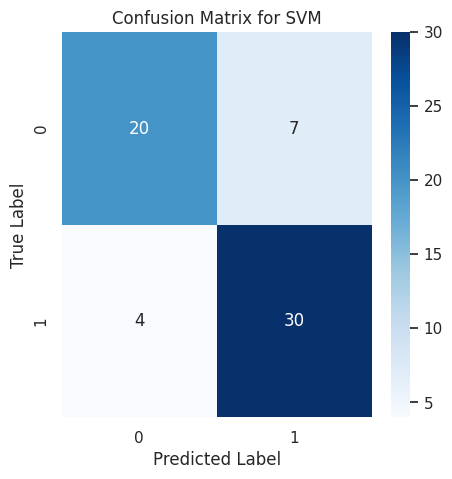

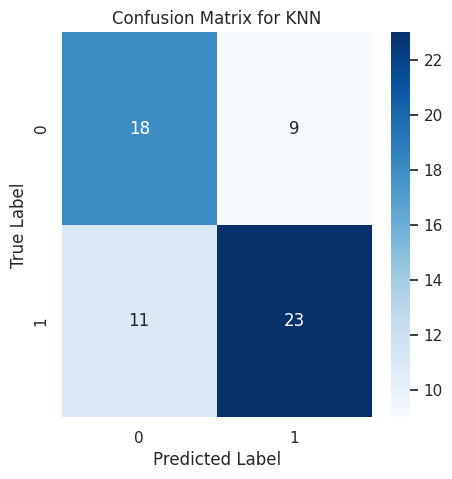

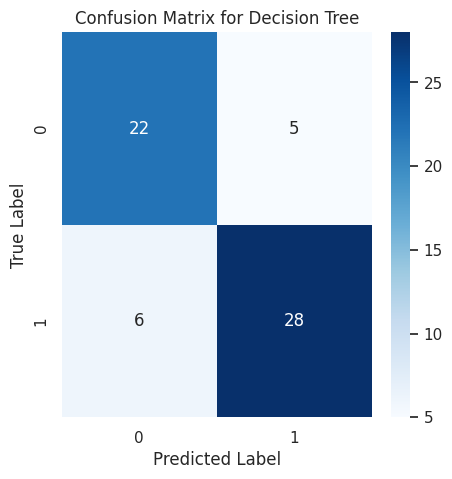

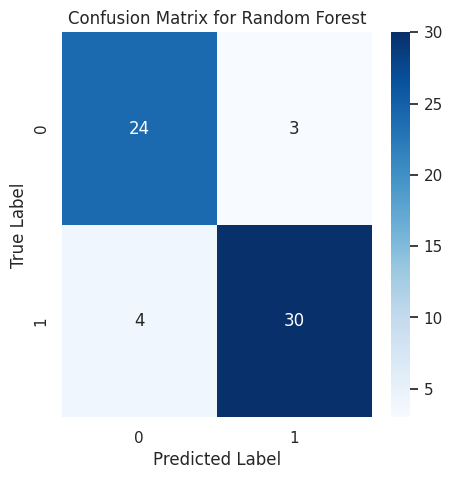

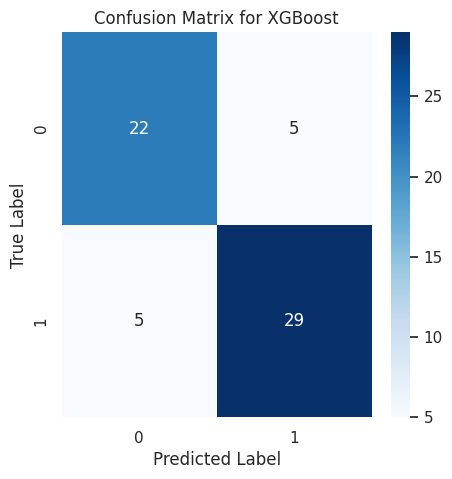

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using your models:

# Logistic Regression
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Naive Bayes
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Support Vector Machine
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# K-Nearest Neighbors
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# XGBoost
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



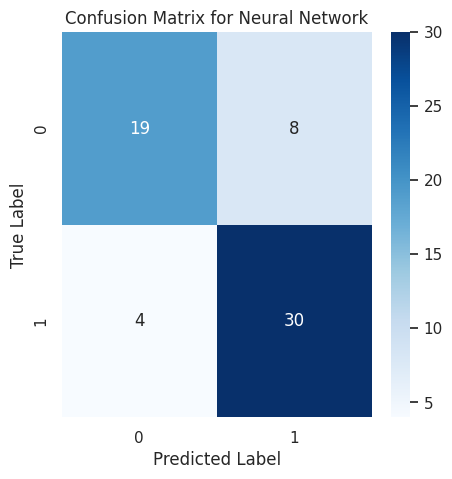

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using your Neural Network model:

cm_nn = confusion_matrix(Y_test, Y_pred_nn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_lr from your Logistic Regression model

precision = precision_score(Y_test, Y_pred_lr)
recall = recall_score(Y_test, Y_pred_lr)
f1 = f1_score(Y_test, Y_pred_lr)

print("Metrics for Logistic Regression:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Logistic Regression:
  Precision: 0.8571
  Recall: 0.8824
  F1 Score: 0.8696


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_rf from your Random Forest model

precision = precision_score(Y_test, Y_pred_rf)
recall = recall_score(Y_test, Y_pred_rf)
f1 = f1_score(Y_test, Y_pred_rf)

print("Metrics for Random Forest:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Random Forest:
  Precision: 0.9091
  Recall: 0.8824
  F1 Score: 0.8955


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_xgb from your XGBoost model

precision = precision_score(Y_test, Y_pred_xgb)
recall = recall_score(Y_test, Y_pred_xgb)
f1 = f1_score(Y_test, Y_pred_xgb)

print("Metrics for XGBoost:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for XGBoost:
  Precision: 0.8529
  Recall: 0.8529
  F1 Score: 0.8529


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_nb from your Naive Bayes model

precision = precision_score(Y_test, Y_pred_nb)
recall = recall_score(Y_test, Y_pred_nb)
f1 = f1_score(Y_test, Y_pred_nb)

print("Metrics for Naive Bayes:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Naive Bayes:
  Precision: 0.8378
  Recall: 0.9118
  F1 Score: 0.8732


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_svm from your SVM model

precision = precision_score(Y_test, Y_pred_svm)
recall = recall_score(Y_test, Y_pred_svm)
f1 = f1_score(Y_test, Y_pred_svm)

print("Metrics for Support Vector Machine:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Support Vector Machine:
  Precision: 0.8108
  Recall: 0.8824
  F1 Score: 0.8451


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_dt from your Decision Tree model

precision = precision_score(Y_test, Y_pred_dt)
recall = recall_score(Y_test, Y_pred_dt)
f1 = f1_score(Y_test, Y_pred_dt)

print("Metrics for Decision Tree:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Decision Tree:
  Precision: 0.8485
  Recall: 0.8235
  F1 Score: 0.8358


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_nn from your Neural Network model

precision = precision_score(Y_test, Y_pred_nn)
recall = recall_score(Y_test, Y_pred_nn)
f1 = f1_score(Y_test, Y_pred_nn)

print("Metrics for Neural Network:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Neural Network:
  Precision: 0.7895
  Recall: 0.8824
  F1 Score: 0.8333


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_knn from your KNN model

precision = precision_score(Y_test, Y_pred_knn)
recall = recall_score(Y_test, Y_pred_knn)
f1 = f1_score(Y_test, Y_pred_knn)

print("Metrics for K-Nearest Neighbors:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for K-Nearest Neighbors:
  Precision: 0.7188
  Recall: 0.6765
  F1 Score: 0.6970


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/heart (2).csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset["target"].describe()


,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
dataset["target"].unique()


array([1, 0])

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


target
1    165
0    138
Name: count, dtype: int64


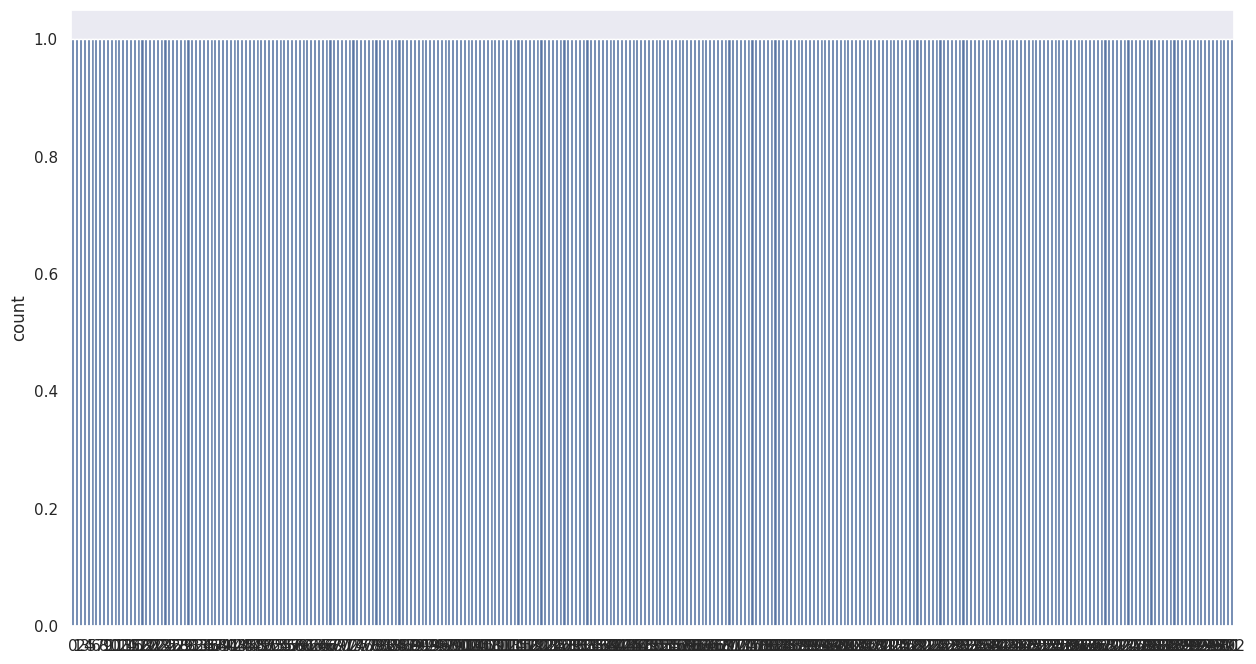

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)
#plt.bar(target_temp,y)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [ ]:
dataset["sex"].unique()

array([1, 0])

<BarContainer object of 303 artists>

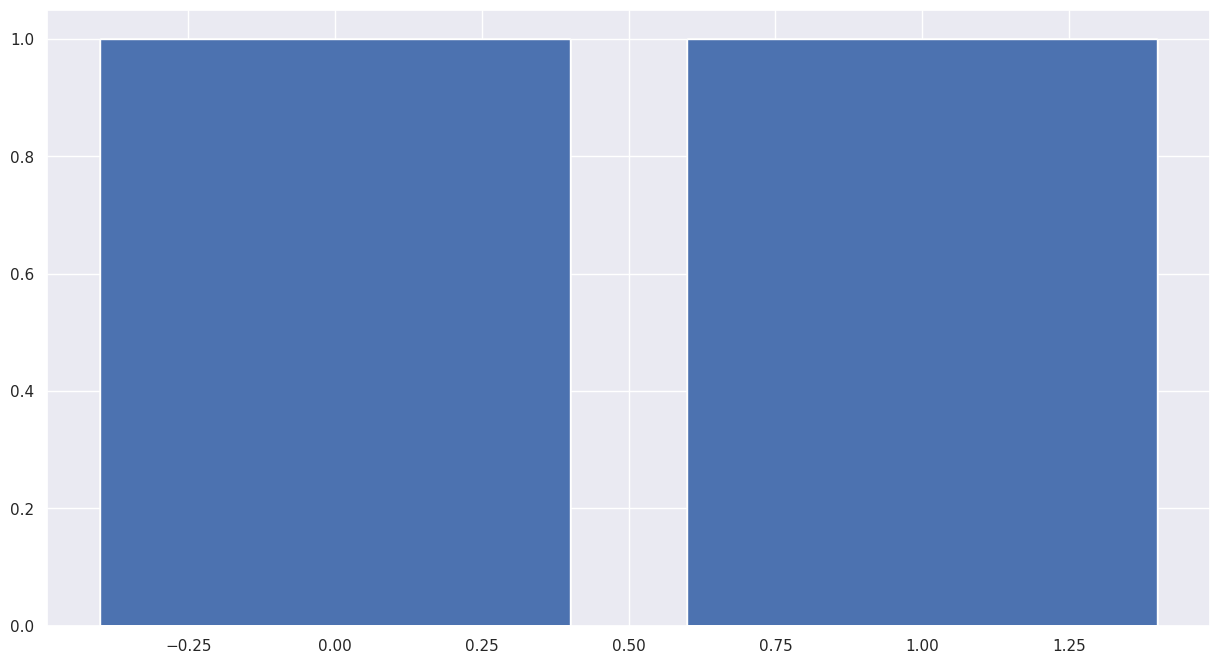

In [ ]:
#sns.barplot(dataset["sex"])
plt.bar(dataset["sex"],y)

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: ylabel='target'>

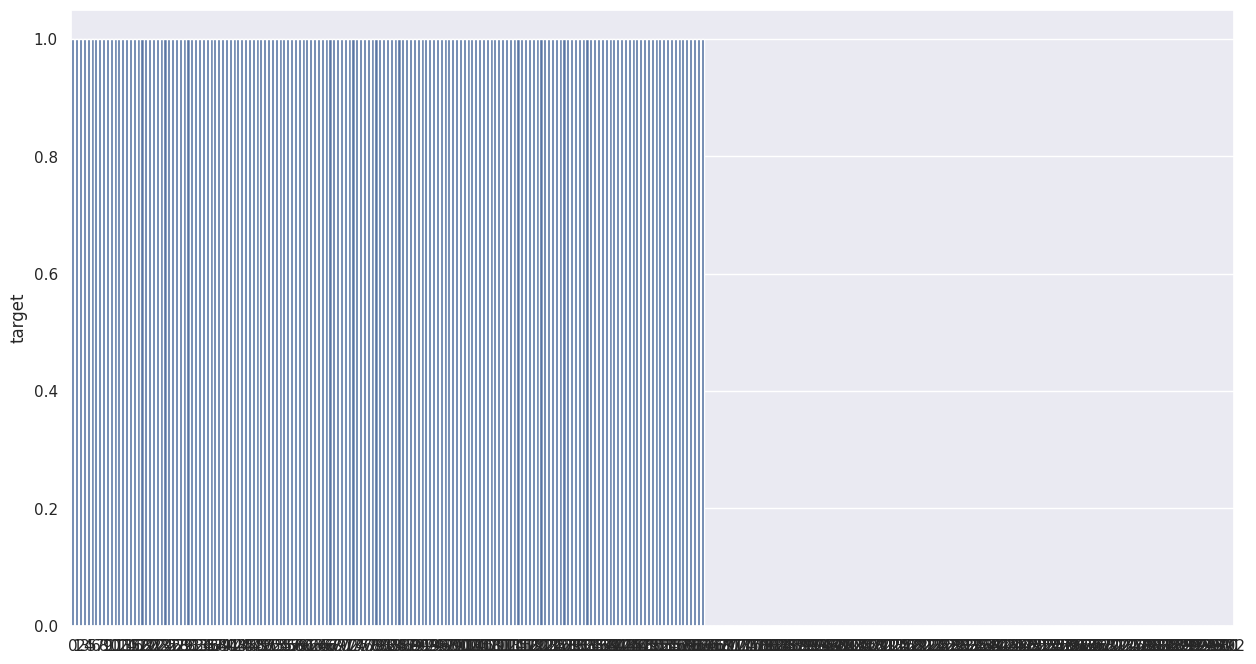

In [ ]:
sns.barplot(y)

In [ ]:
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dataset["fbs"].unique()

array([1, 0])

In [ ]:
dataset["fbs"].unique()

array([1, 0])

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: ylabel='restecg'>

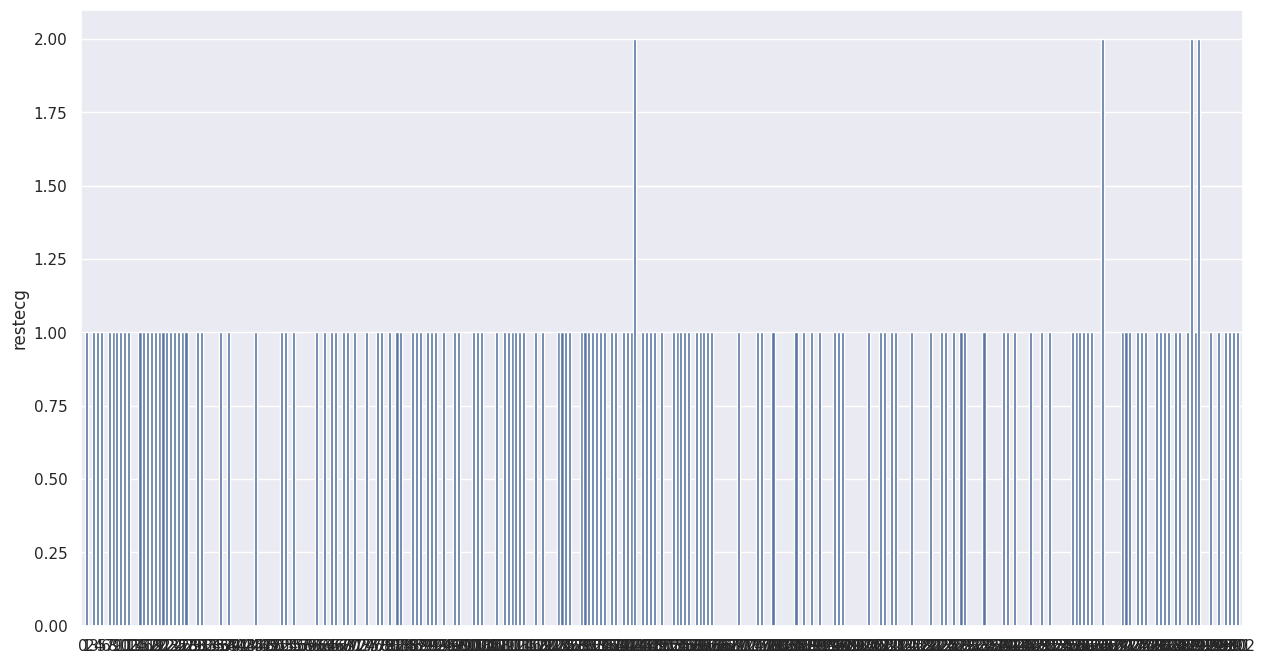

In [ ]:
sns.barplot(dataset["restecg"])

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: ylabel='exang'>

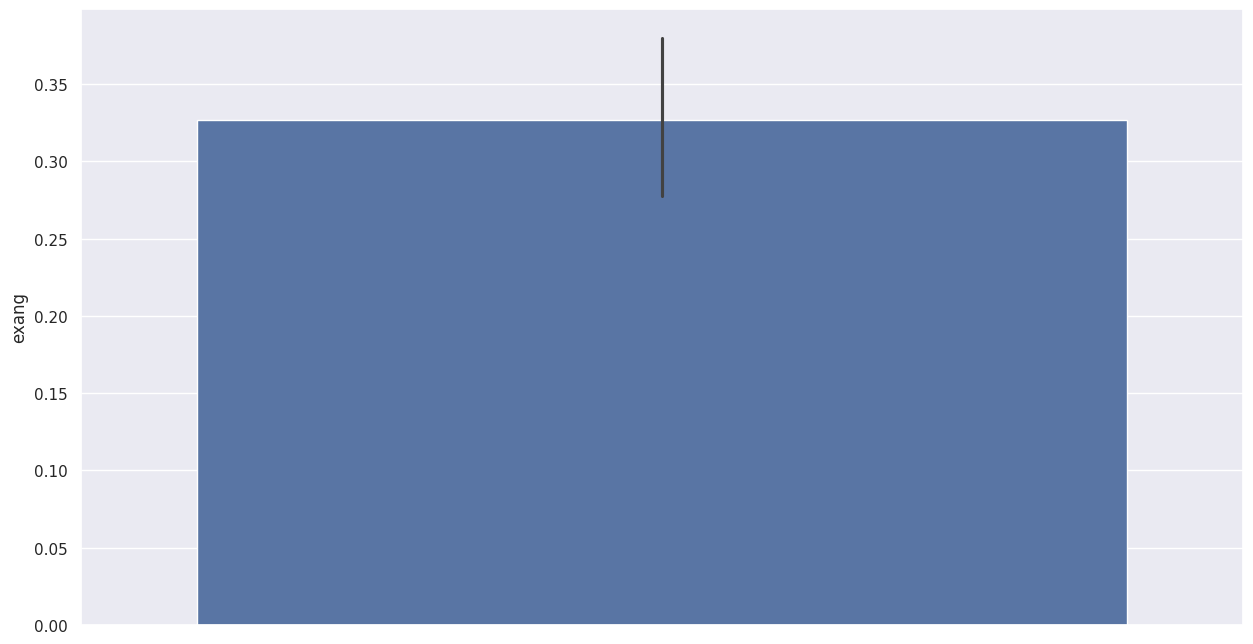

In [ ]:
sns.barplot(y=dataset["exang"])

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: ylabel='slope'>

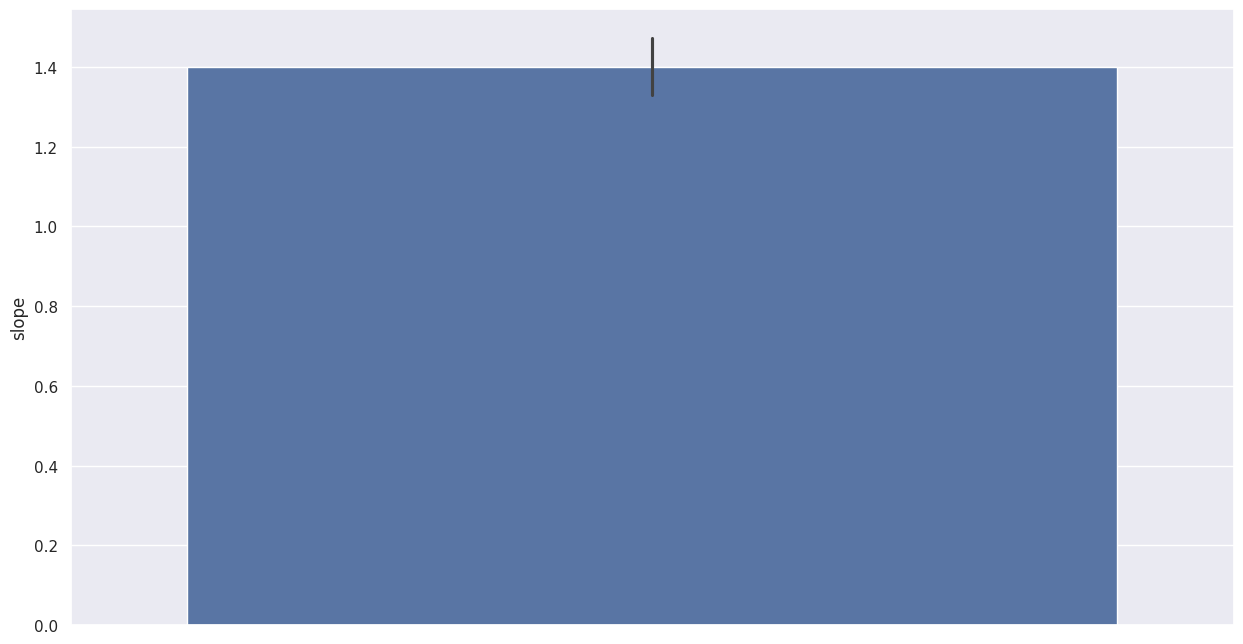

In [ ]:
sns.barplot(y=dataset["slope"])

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

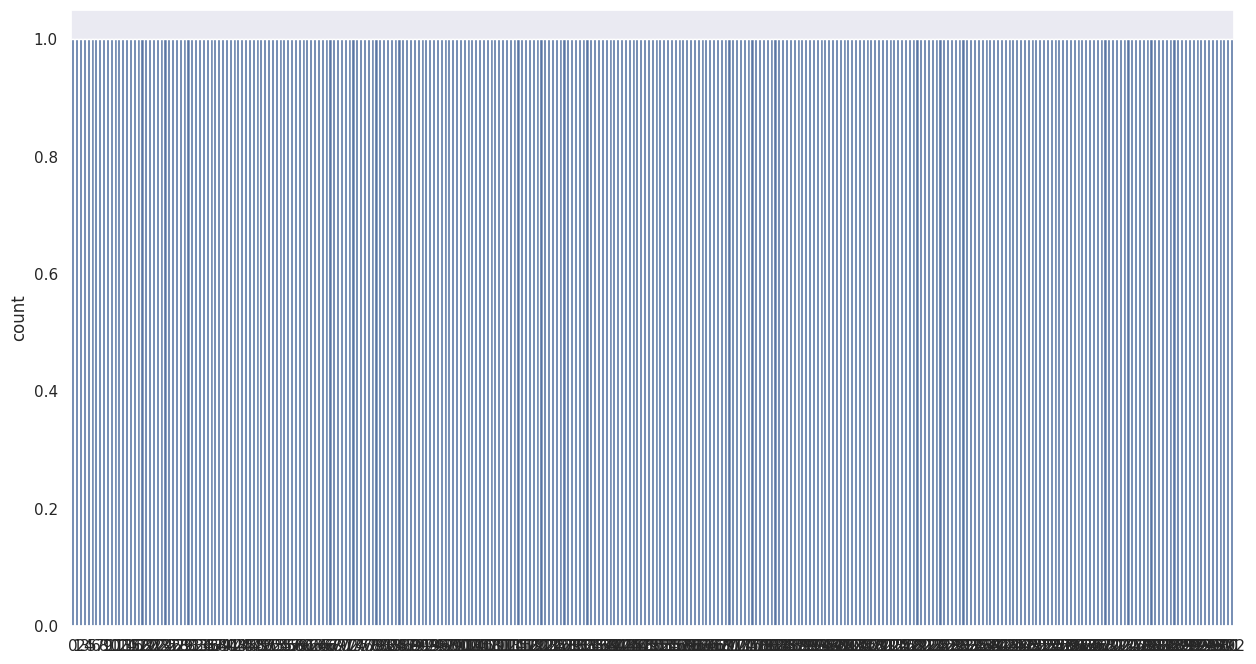

In [ ]:
sns.countplot(dataset["ca"])

<Axes: ylabel='ca'>

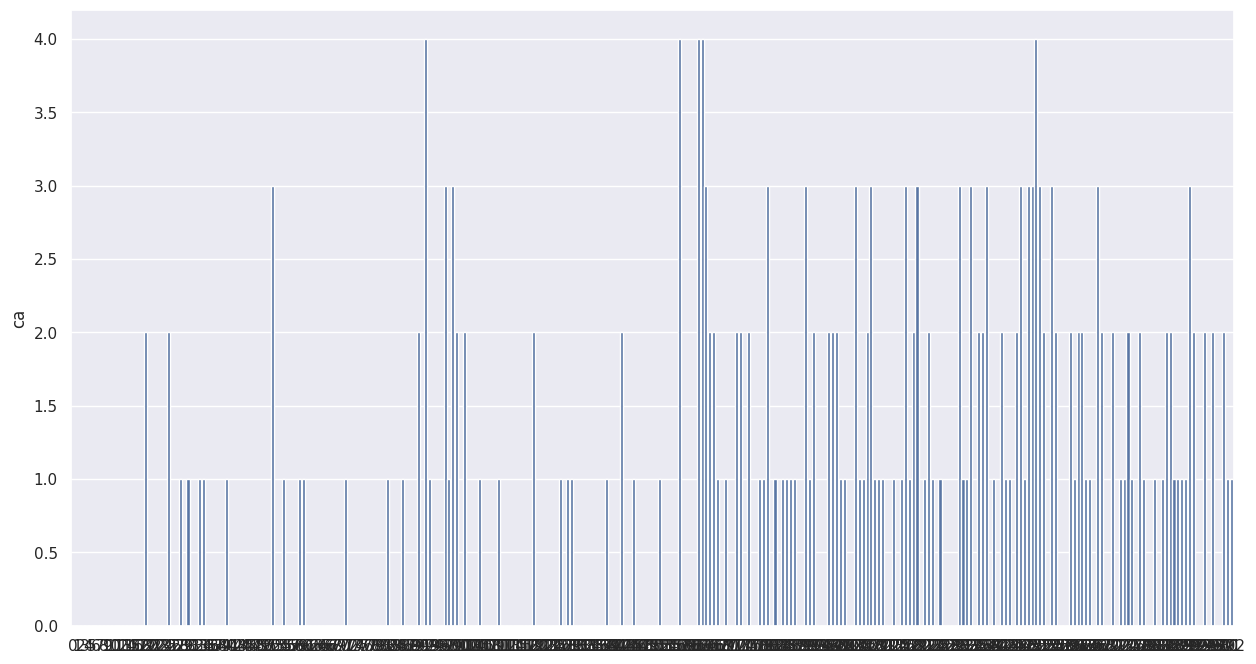

In [ ]:
sns.barplot(dataset["ca"])

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: ylabel='thal'>

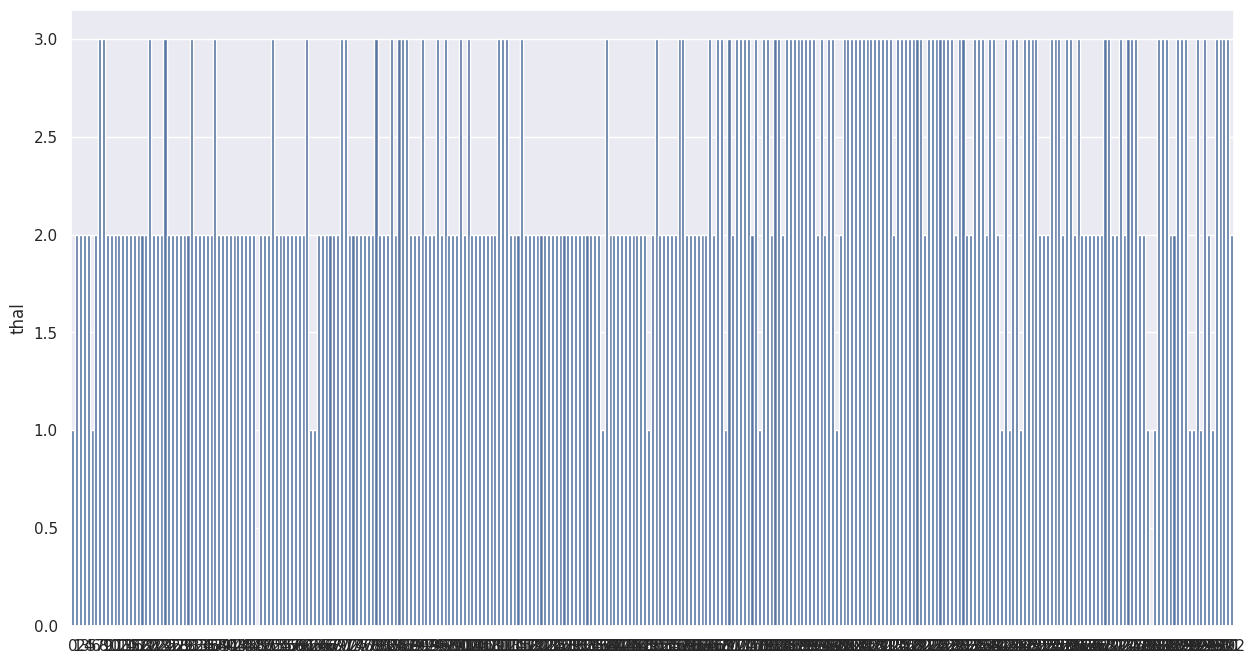

In [ ]:
sns.barplot(dataset["thal"])

<Axes: xlabel='thal', ylabel='Density'>

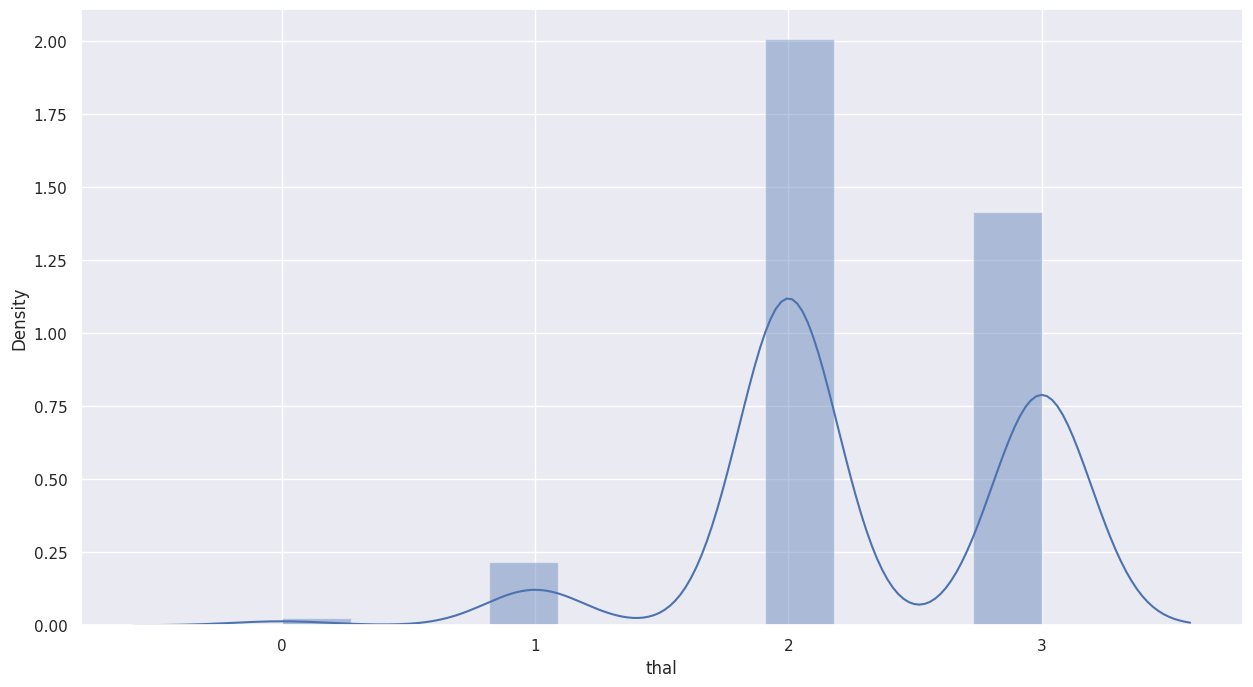

In [ ]:
sns.distplot(dataset["thal"])

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape
Y_test.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

(61,)
The accuracy score achieved using Decision Tree is: 81.97 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4432 - loss: 70.6462
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4749 - loss: 62.8554 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4758 - loss: 59.0234 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4416 - loss: 59.2506 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4562 - loss: 55.1923  
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4715 - loss: 50.8385 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4745 - loss: 47.3922 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4342 - loss: 47.8143 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4676 - loss: 40.0991 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4721 - loss: 34.6057 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4403 - loss: 31.2159 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 

Using TensorFlow backend.

In [ ]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 78.69 %


VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):

    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 78.69 %


<BarContainer object of 8 artists>

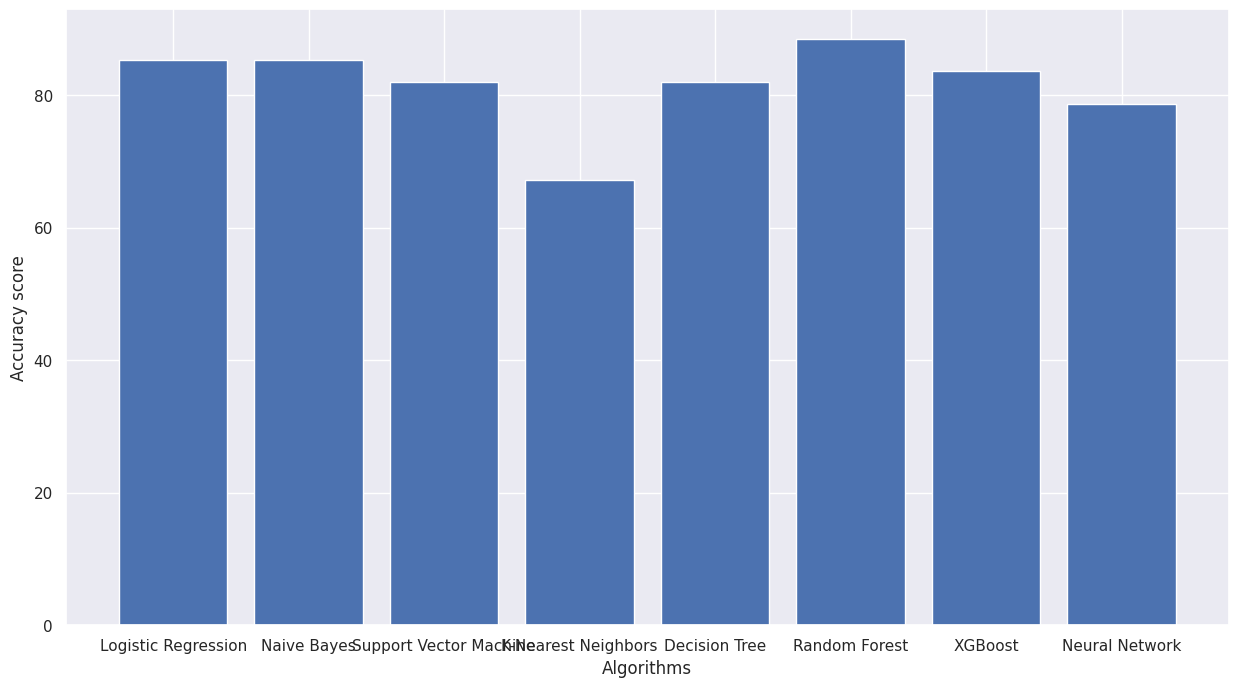

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

#sns.barplot(algorithms,scores)
plt.bar(algorithms,scores)


In [ ]:
# For Logistic Regression:
cm_lr = confusion_matrix(Y_test, Y_pred_lr)

# For Naive Bayes:
cm_nb = confusion_matrix(Y_test, Y_pred_nb)

# For SVM:
cm_svm = confusion_matrix(Y_test, Y_pred_svm)

# ... (Similarly for other models)

Confusion Matrix for Logistic Regression:
[[22  5]
 [ 4 30]]


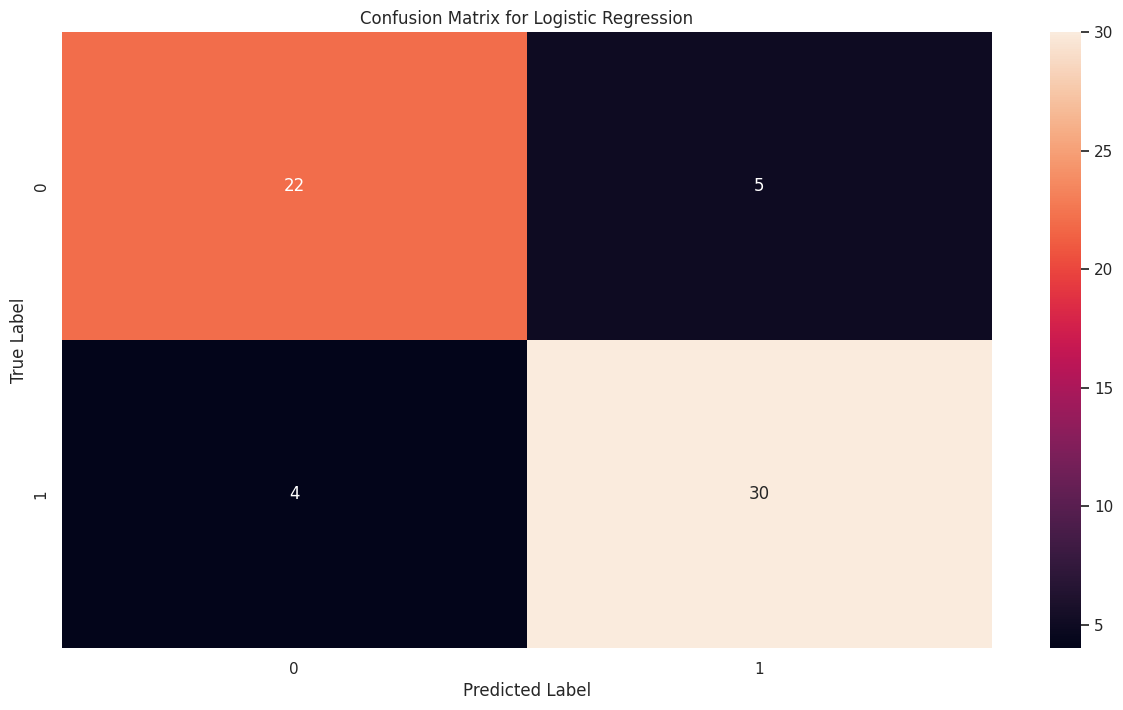

In [ ]:
# Using print():
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Using seaborn for a heatmap visualization:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_lr, annot=True, fmt="d")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ... (Similarly for other models)

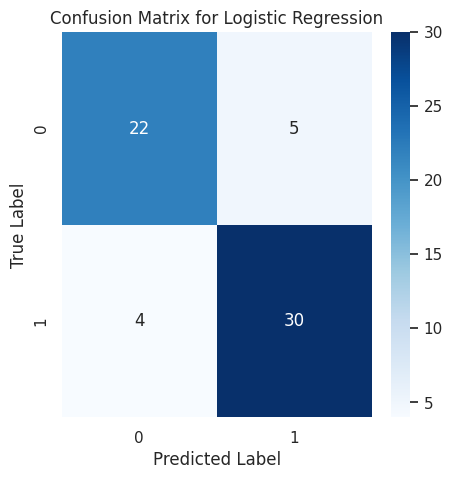

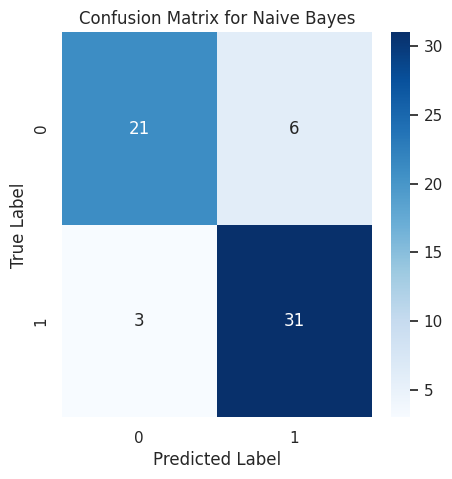

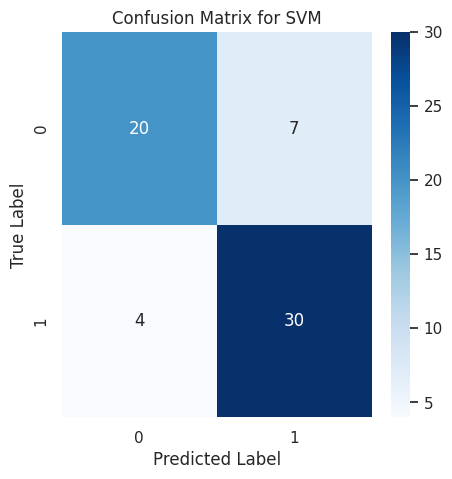

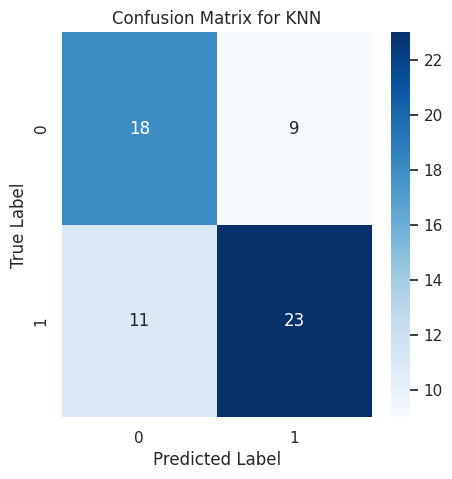

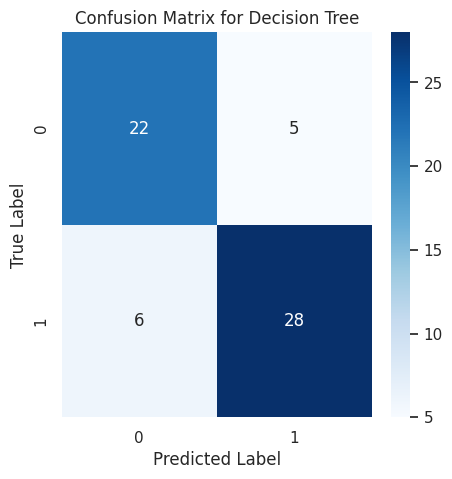

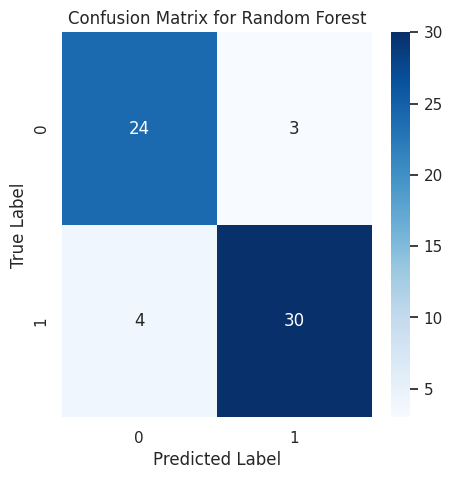

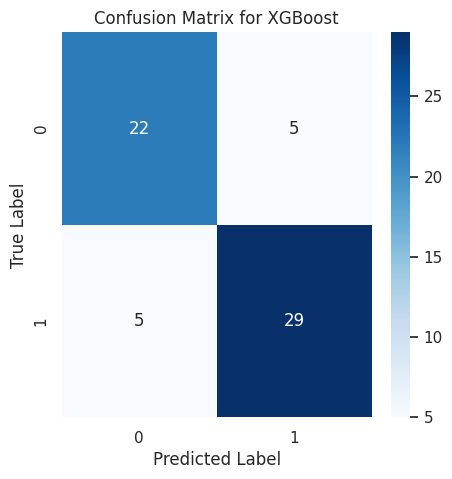

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using your models:

# Logistic Regression
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Naive Bayes
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Support Vector Machine
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# K-Nearest Neighbors
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# XGBoost
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



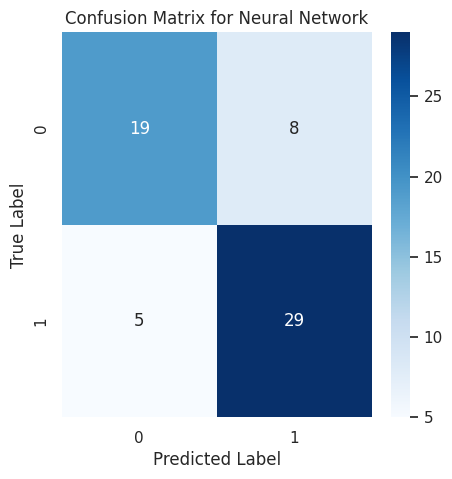

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using your Neural Network model:

cm_nn = confusion_matrix(Y_test, Y_pred_nn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_lr from your Logistic Regression model

precision = precision_score(Y_test, Y_pred_lr)
recall = recall_score(Y_test, Y_pred_lr)
f1 = f1_score(Y_test, Y_pred_lr)

print("Metrics for Logistic Regression:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Logistic Regression:
  Precision: 0.8571
  Recall: 0.8824
  F1 Score: 0.8696


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_rf from your Random Forest model

precision = precision_score(Y_test, Y_pred_rf)
recall = recall_score(Y_test, Y_pred_rf)
f1 = f1_score(Y_test, Y_pred_rf)

print("Metrics for Random Forest:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Random Forest:
  Precision: 0.9091
  Recall: 0.8824
  F1 Score: 0.8955


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_xgb from your XGBoost model

precision = precision_score(Y_test, Y_pred_xgb)
recall = recall_score(Y_test, Y_pred_xgb)
f1 = f1_score(Y_test, Y_pred_xgb)

print("Metrics for XGBoost:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for XGBoost:
  Precision: 0.8529
  Recall: 0.8529
  F1 Score: 0.8529


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_nb from your Naive Bayes model

precision = precision_score(Y_test, Y_pred_nb)
recall = recall_score(Y_test, Y_pred_nb)
f1 = f1_score(Y_test, Y_pred_nb)

print("Metrics for Naive Bayes:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Naive Bayes:
  Precision: 0.8378
  Recall: 0.9118
  F1 Score: 0.8732


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_svm from your SVM model

precision = precision_score(Y_test, Y_pred_svm)
recall = recall_score(Y_test, Y_pred_svm)
f1 = f1_score(Y_test, Y_pred_svm)

print("Metrics for Support Vector Machine:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Support Vector Machine:
  Precision: 0.8108
  Recall: 0.8824
  F1 Score: 0.8451


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_dt from your Decision Tree model

precision = precision_score(Y_test, Y_pred_dt)
recall = recall_score(Y_test, Y_pred_dt)
f1 = f1_score(Y_test, Y_pred_dt)

print("Metrics for Decision Tree:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Decision Tree:
  Precision: 0.8485
  Recall: 0.8235
  F1 Score: 0.8358


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_nn from your Neural Network model

precision = precision_score(Y_test, Y_pred_nn)
recall = recall_score(Y_test, Y_pred_nn)
f1 = f1_score(Y_test, Y_pred_nn)

print("Metrics for Neural Network:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for Neural Network:
  Precision: 0.7838
  Recall: 0.8529
  F1 Score: 0.8169


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have Y_test and Y_pred_knn from your KNN model

precision = precision_score(Y_test, Y_pred_knn)
recall = recall_score(Y_test, Y_pred_knn)
f1 = f1_score(Y_test, Y_pred_knn)

print("Metrics for K-Nearest Neighbors:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

Metrics for K-Nearest Neighbors:
  Precision: 0.7188
  Recall: 0.6765
  F1 Score: 0.6970


# Task
Create a JSON API using Flask, Flask-CORS, NumPy, Pandas, and Pickle to serve predictions from a trained machine learning model, and provide guidance on integrating it with a frontend.

## Save the trained model

### Subtask:
Save the trained machine learning model (Random Forest seems to be the best performer based on accuracy) using `pickle`.


**Reasoning**:
The subtask is to save the trained Random Forest model. I will import the pickle library and save the model to a file.



In [ ]:
import pickle

filename = 'model.pkl'
pickle.dump(rf, open(filename, 'wb'))

## Create a flask application

### Subtask:
Set up a basic Flask application.


**Reasoning**:
Set up a basic Flask application by importing the Flask class and creating an instance.



In [ ]:
from flask import Flask
app = Flask(__name__)

## Implement the api endpoint

### Subtask:
Create an API endpoint that accepts input data, makes a prediction using the loaded model, and returns the prediction in JSON format.


**Reasoning**:
Define a Flask route that accepts POST requests, load the model, get and convert input data, make a prediction, and return the prediction as JSON.



In [ ]:
from flask import request, jsonify
import pickle
import pandas as pd

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Load the saved model
        with open('model.pkl', 'rb') as model_file:
            model = pickle.load(model_file)

        # Get the input data from the request
        input_data = request.get_json(force=True)

        # Convert the input data into a Pandas DataFrame
        input_df = pd.DataFrame([input_data])

        # Make a prediction
        prediction = model.predict(input_df)

        # Return the prediction as a JSON response
        return jsonify({'prediction': int(prediction[0])})

    except Exception as e:
        return jsonify({'error': str(e)})

## Enable cors

### Subtask:
Configure Flask-CORS to allow requests from your frontend.


**Reasoning**:
Import the CORS class and initialize it with the Flask app to enable cross-origin requests.



In [ ]:
from flask_cors import CORS

CORS(app)

## Integrate with the frontend

### Subtask:
Provide guidance on how to integrate this Flask API with a frontend application (this step will be more conceptual as the frontend code is not available).


## Summary:

### Data Analysis Key Findings

*   A trained Random Forest model was successfully saved to a file named `model.pkl` using the `pickle` library.
*   A basic Flask application was initialized to serve as the web framework for the API.
*   A `/predict` endpoint was implemented using Flask, which accepts POST requests with input data in JSON format, loads the saved machine learning model, uses it to make a prediction, and returns the prediction as a JSON response. Error handling was included in this endpoint.
*   Flask-CORS was configured to enable cross-origin requests to the Flask API, allowing a frontend application hosted on a different domain to interact with it.

### Insights or Next Steps

*   To integrate with a frontend, the frontend application should send a POST request to the `/predict` endpoint with input features in a JSON object and expect a JSON response containing the prediction under the key 'prediction'.
*   For production deployment, consider using a more robust web server like Gunicorn or uWSGI and deploying the application to a cloud platform.


In [ ]:
if __name__ == '__main__':
    # You can specify a port here if needed, e.g., port=5000
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


Streaming output truncated to the last 5000 lines.
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Heart Disease Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
             margin: 20px;
        }
        .container {
            max-width: 600px;
            margin: 0 auto;
            padding: 20px;
            border: 1px solid #ccc;
            border-radius: 8px;
        }
        .form-group {
            margin-bottom: 15px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
        }
        input[type="text"],
        input[type="number"] {
            width: 100%;
            padding: 8px;
            box-sizing: border-box;
            border: 1px solid #ccc;
            border-radius: 4px;
        }
        button {
            background-color: #4CAF50;
            color: white;
            padding: 10px 15px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-size: 16px;
        }
        button:hover {
            background-color: #45a049;
        }
        #prediction-result {
            margin-top: 20px;
            font-size: 18px;
            font-weight: bold;
        }
    </style>
</head>
<body>

<div class="container">
    <h2>Heart Disease Prediction</h2>
    <form id="prediction-form">
        <div class="form-group">
            <label for="age">Age:</label>
            <input type="number" id="age" name="age" required>
        </div>
        <div class="form-group">
            <label for="sex">Sex (1: male, 0: female):</label>
            <input type="number" id="sex" name="sex" required>
        </div>
        <div class="form-group">
            <label for="cp">Chest Pain Type (0-3):</label>
            <input type="number" id="cp" name="cp" required>
        </div>
        <div class="form-group">
            <label for="trestbps">Resting Blood Pressure:</label>
            <input type="number" id="trestbps" name="trestbps" required>
        </div>
        <div class="form-group">
            <label for="chol">Serum Cholestoral (mg/dl):</label>
            <input type="number" id="chol" name="chol" required>
        </div>
        <div class="form-group">
            <label for="fbs">Fasting Blood Sugar > 120 mg/dl (1: true, 0: false):</label>
            <input type="number" id="fbs" name="fbs" required>
        </div>
        <div class="form-group">
            <label for="restecg">Resting Electrocardiographic Results (0-2):</label>
            <input type="number" id="restecg" name="restecg" required>
        </div>
        <div class="form-group">
            <label for="thalach">Maximum Heart Rate Achieved:</label>
            <input type="number" id="thalach" name="thalach" required>
        </div>
        <div class="form-group">
            <label for="exang">Exercise Induced Angina (1: yes, 0: no):</label>
            <input type="number" id="exang" name="exang" required>
        </div>
        <div class="form-group">
            <label for="oldpeak">Oldpeak:</label>
            <input type="number" id="oldpeak" name="oldpeak" step="0.1" required>
        </div>
        <div class="form-group">
            <label for="slope">Slope of the Peak Exercise ST Segment (0-2):</label>
            <input type="number" id="slope" name="slope" required>
        </div>
         <div class="form-group">
            <label for="ca">Number of Major Vessels (0-4):</label>
            <input type="number" id="ca" name="ca" required>
        </div>
         <div class="form-group">
            <label for="thal">Thal (0-3):</label>
            <input type="number" id="thal" name="thal" required>
        </div>
        <button type="submit">Predict</button>
    </form>

    <div id="prediction-result"></div>
</div>

<script>
    document.getElementById('prediction-form').addEventListener('submit', function(event) {
        event.preventDefault(); // Prevent the default form submission

        const inputData = {
            age: parseFloat(document.getElementById('age').value),
            sex: parseFloat(document.getElementById('sex').value),
            cp: parseFloat(document.getElementById('cp').value),
            trestbps: parseFloat(document.getElementById('trestbps').value),
            chol: parseFloat(document.getElementById('chol').value),
            fbs: parseFloat(document.getElementById('fbs').value),
            restecg: parseFloat(document.getElementById('restecg').value),
            thalach: parseFloat(document.getElementById('thalach').value),
            exang: parseFloat(document.getElementById('exang').value),
            oldpeak: parseFloat(document.getElementById('oldpeak').value),
            slope: parseFloat(document.getElementById('slope').value),
            ca: parseFloat(document.getElementById('ca').value),
            thal: parseFloat(document.getElementById('thal').value)
        };

        // Replace 'http://127.0.0.1:5000/' with your actual Flask API endpoint
        fetch('http://127.0.0.1:5000/predict', {
            method: 'POST',
            headers: {
                'Content-Type': 'application/json',
            },
            body: JSON.stringify(inputData),
        })
        .then(response => response.json())
        .then(data => {
            // Handle the prediction result
            const predictionResultElement = document.getElementById('prediction-result');
            if (data.prediction !== undefined) {
                predictionResultElement.textContent = 'Prediction: ' + (data.prediction === 1 ? 'Heart Disease Likely' : 'No Heart Disease Likely');
            } else if (data.error) {
                predictionResultElement.textContent = 'Error: ' + data.error;
            }
        })
        .catch((error) => {
            console.error('Error:', error);
            document.getElementById('prediction-result').textContent = 'An error occurred while fetching the prediction.';
        });
    });
</script>

</body>
</html>

SyntaxError: invalid decimal literal (ipython-input-428-2399633578.py, line 8)